# Лабораторная работа №5

## GradientBoostingClassifier/ Бейзлайн 

### Импорт

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

### Загрузка датасета

In [10]:
df_alz = pd.read_csv('alzheimers.csv')
print("Alzheimer's Dataset shape:", df_alz .shape)
df_alz .head()

Alzheimer's Dataset shape: (2149, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


### Подготовка данных для классификации

In [12]:
df_alz_clean = df_alz.drop(['PatientID', 'DoctorInCharge'], axis=1)

print(f"Уникальные значения Diagnosis: {df_alz_clean['Diagnosis'].unique()}")

X_clf = df_alz_clean.drop('Diagnosis', axis=1)
y_clf = df_alz_clean['Diagnosis']

print(f"\nФорма X: {X_clf.shape}")
print(f"Форма y: {y_clf.shape}")

Уникальные значения Diagnosis: [0 1]

Форма X: (2149, 32)
Форма y: (2149,)


### Разделение на train/test

In [5]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print(f"\nРазделение данных:")
print(f"X_train: {X_train_clf.shape}")
print(f"X_test: {X_test_clf.shape}")


Разделение данных:
X_train: (1719, 32)
X_test: (430, 32)


### Создание и обучение бейзлайн-модели RandomForestClassifier

In [6]:
gb_clf_baseline = GradientBoostingClassifier(random_state=42)
gb_clf_baseline.fit(X_train_clf, y_train_clf)

GradientBoostingClassifier(random_state=42)

### Оценка качества модели

Accuracy (Точность): 0.9488
Precision (Точность): 0.9333
Recall (Полнота): 0.9211
F1-Score: 0.9272
ROC-AUC: 0.9463
Classification Report:
                  precision    recall  f1-score   support

No Alzheimer (0)       0.96      0.96      0.96       278
   Alzheimer (1)       0.93      0.92      0.93       152

        accuracy                           0.95       430
       macro avg       0.95      0.94      0.94       430
    weighted avg       0.95      0.95      0.95       430



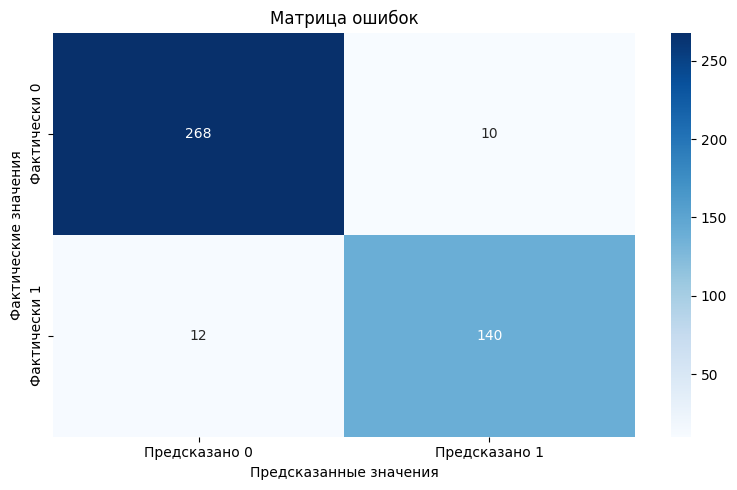

In [7]:
y_pred_clf = gb_clf_baseline.predict(X_test_clf)
y_pred_proba_clf = gb_clf_baseline.predict_proba(X_test_clf)[:, 1]


accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)
roc_auc = roc_auc_score(y_test_clf, y_pred_proba_clf)

print(f"Accuracy (Точность): {accuracy:.4f}")
print(f"Precision (Точность): {precision:.4f}")
print(f"Recall (Полнота): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


print("Classification Report:")
print(classification_report(y_test_clf, y_pred_clf, 
                           target_names=['No Alzheimer (0)', 'Alzheimer (1)']))

fig, axes = plt.subplots(1, figsize=(8, 5))

cm = confusion_matrix(y_test_clf, y_pred_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Предсказано 0', 'Предсказано 1'],
            yticklabels=['Фактически 0', 'Фактически 1'])
axes.set_title('Матрица ошибок')
axes.set_ylabel('Фактические значения')
axes.set_xlabel('Предсказанные значения')


plt.tight_layout()
plt.show()

##  GradientBoostingRegressor / Бейзлайн 

### Загрузка датасета

In [60]:
df_students = pd.read_csv('student_performance.csv')
print(f"Размер датасета Student Performance: {df_students.shape}")

missing_values = df_students.isnull().sum()
print("\nПропущенные значения:")
print(missing_values[missing_values > 0])
df_students.head()

Размер датасета Student Performance: (6607, 20)

Пропущенные значения:
Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Подготовка данных

In [61]:
df_students_prepared = df_students.copy()
for column in df_students_prepared.columns:
    if df_students_prepared[column].isnull().any():
        mode_value = df_students_prepared[column].mode()[0]
        df_students_prepared[column].fillna(mode_value, inplace=True)

categorical_cols = df_students_prepared.select_dtypes(include=['object']).columns.tolist()
if 'Exam_Score' in categorical_cols:
    categorical_cols.remove('Exam_Score')

print(f"\nКатегориальные признаки: {categorical_cols}")

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), 
         categorical_cols)
    ],
    remainder='passthrough'
)

X_reg = df_students_prepared.drop('Exam_Score', axis=1)
y_reg = df_students_prepared['Exam_Score']

X_reg_encoded = preprocessor.fit_transform(X_reg)

encoder = preprocessor.named_transformers_['cat']
encoded_cat_features = encoder.get_feature_names_out(categorical_cols)
numeric_features = [col for col in X_reg.columns if col not in categorical_cols]
all_features = list(encoded_cat_features) + numeric_features

print(f"\nРазмерность после кодирования: {X_reg_encoded.shape}")
print(f"Количество признаков: {len(all_features)}")


Категориальные признаки: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Размерность после кодирования: (6607, 27)
Количество признаков: 27


### Разделение на train/test

In [62]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_encoded, y_reg, test_size=0.2, random_state=42
)

print(f"\nРазделение данных для регрессии:")
print(f"X_train: {X_train_reg.shape}")
print(f"X_test: {X_test_reg.shape}")


Разделение данных для регрессии:
X_train: (5285, 27)
X_test: (1322, 27)


### Создание и обучение бейзлайн-модели RandomForestRegressor

In [63]:
gb_reg_baseline = GradientBoostingRegressor(random_state=42)
gb_reg_baseline.fit(X_train_reg, y_train_reg)

GradientBoostingRegressor(random_state=42)

### Оценка качества модели

MAE: 0.8225
MSE: 3.8183
RMSE: 1.9540
R²: 0.7299


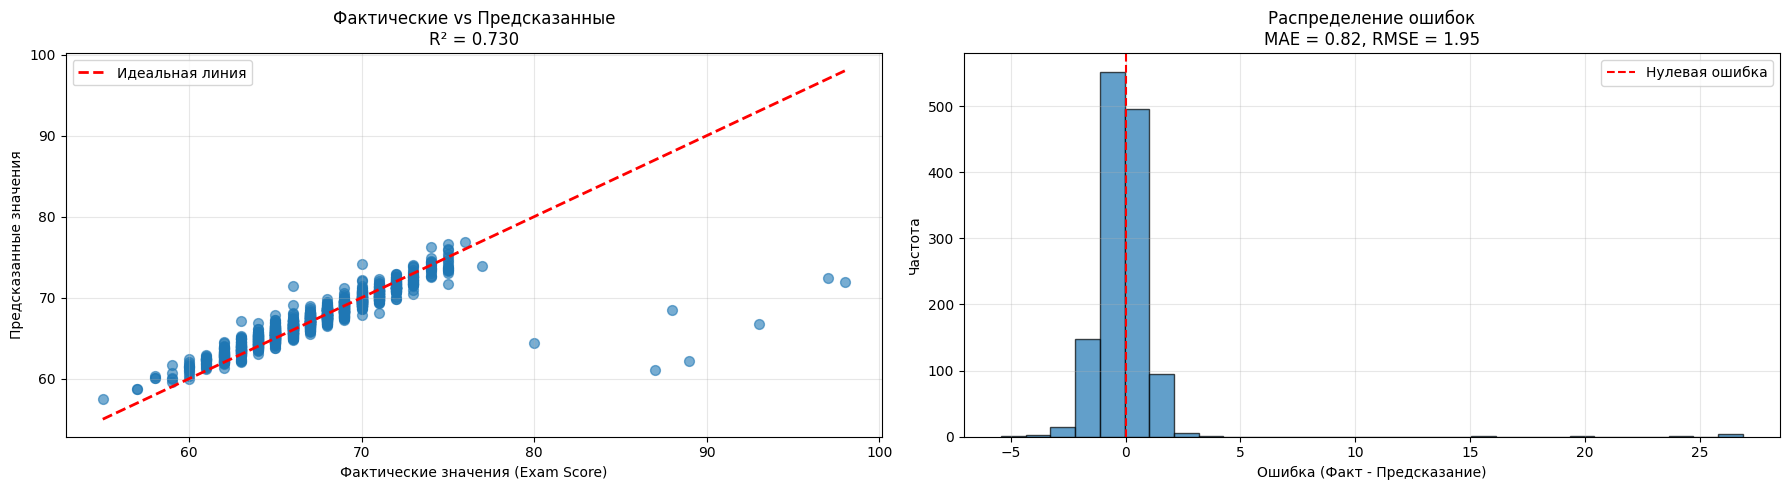

In [64]:
y_pred_reg = gb_reg_baseline.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].scatter(y_test_reg, y_pred_reg, alpha=0.6, s=50)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 
             'r--', lw=2, label='Идеальная линия')
axes[0].set_xlabel('Фактические значения (Exam Score)')
axes[0].set_ylabel('Предсказанные значения')
axes[0].set_title(f'Фактические vs Предсказанные\nR² = {r2:.3f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

errors = y_test_reg - y_pred_reg
axes[1].hist(errors, bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', label='Нулевая ошибка')
axes[1].set_xlabel('Ошибка (Факт - Предсказание)')
axes[1].set_ylabel('Частота')
axes[1].set_title(f'Распределение ошибок\nMAE = {mae:.2f}, RMSE = {rmse:.2f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

baseline_results = {
    'classification': {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'model': gb_clf_baseline
    },
    'regression': {
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'model': gb_reg_baseline
    }
}

##	Улучшение бейзлайна

## GradientBoostingClassifier

### Формулировка гипотез для улучшения модели классификации

**Гипотеза 1: Балансировка классов**
- **Что будем делать:** Используем параметр class_weight='balanced' в GradientBoostingClassifier или применим SMOTE для балансировки классов.
- **Обоснование:** В медицинской диагностике пропуск болезни часто более критичен, чем ложное срабатывание. Балансировка классов поможет модели лучше распознавать больных пациентов.

**Гипотеза 2: Подбор гиперпараметров с помощью GridSearchCV**
- **Что будем делать:** Использовать GridSearchCV для поиска оптимальных гиперпараметров: n_estimators, learning_rate, max_depth, subsample.
- **Обоснование:** Параметры по умолчанию не всегда оптимальны для конкретного датасета. Систематический поиск по сетке поможет найти наилучшую комбинацию гиперпараметров.

**Гипотеза 3: Уменьшение количества признаков**
- **Что будем делать:** Отберем топ-15 наиболее важных признаков на основе feature_importance и обучим модель только на них.
- **Обоснование:** Некоторые признаки могут быть шумом или иметь низкую предсказательную силу. Уменьшение размерности может снизить переобучение и ускорить обучение модели.

**Гипотеза 4: Изменение функции потерь**
- **Что будем делать:**  Попробуем разные функции потерь: 'deviance' и 'exponential'.
- **Обоснование:** Выбор функции потерь влияет на то, как модель минимизирует ошибку. 'exponential' может быть более устойчивой к выбросам.

### Проверка гипотез

In [65]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import time
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV


baseline_clf_metrics = {
    'Accuracy': 0.9488,
    'Precision': 0.9333,
    'Recall': 0.9211,
    'F1': 0.9272,
    'ROC-AUC': 0.9463
}


#### Проверка Гипотезы 1: Балансировка классов


Результаты с балансировкой классов (sample_weight='balanced'):
Accuracy: 0.9442 (baseline: 0.9488)
Precision: 0.9156 (baseline: 0.9333)
Recall: 0.9276 (baseline: 0.9211)
F1-Score: 0.9216 (baseline: 0.9272)
ROC-AUC: 0.9463 (baseline: 0.9463)

Результаты с SMOTE:
Accuracy: 0.9419 (baseline: 0.9488)
Precision: 0.9097 (baseline: 0.9333)
Recall: 0.9276 (baseline: 0.9211)
F1-Score: 0.9186 (baseline: 0.9272)
ROC-AUC: 0.9476 (baseline: 0.9463)


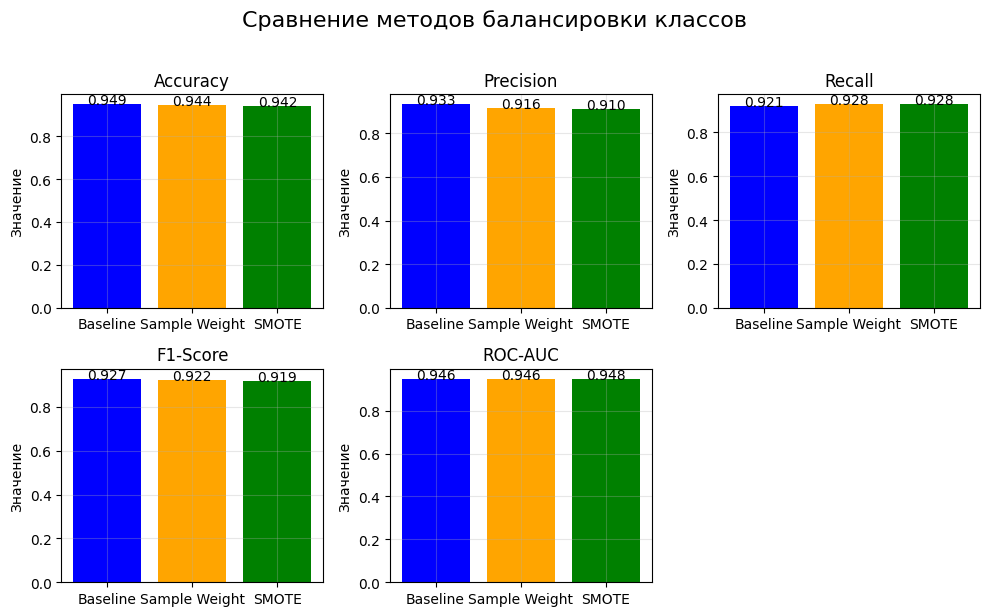

Вывод по Гипотезе 1:
  Балансировка классов почти никак не улучшила модель.
  Улучшение Recall: 0.71%


In [71]:
gb_clf_balanced = GradientBoostingClassifier(random_state=42)
classes = np.unique(y_train_clf)
class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train_clf)
sample_weights = class_weight.compute_sample_weight('balanced', y=y_train_clf)

gb_clf_balanced.fit(X_train_clf, y_train_clf, sample_weight=sample_weights)

y_pred_balanced = gb_clf_balanced.predict(X_test_clf)
y_pred_proba_balanced = gb_clf_balanced.predict_proba(X_test_clf)[:, 1]

accuracy_balanced = accuracy_score(y_test_clf, y_pred_balanced)
precision_balanced = precision_score(y_test_clf, y_pred_balanced)
recall_balanced = recall_score(y_test_clf, y_pred_balanced)
f1_balanced = f1_score(y_test_clf, y_pred_balanced)
roc_auc_balanced = roc_auc_score(y_test_clf, y_pred_proba_balanced)

print("\nРезультаты с балансировкой классов (sample_weight='balanced'):")
print(f"Accuracy: {accuracy_balanced:.4f} (baseline: {baseline_clf_metrics['Accuracy']:.4f})")
print(f"Precision: {precision_balanced:.4f} (baseline: {baseline_clf_metrics['Precision']:.4f})")
print(f"Recall: {recall_balanced:.4f} (baseline: {baseline_clf_metrics['Recall']:.4f})")
print(f"F1-Score: {f1_balanced:.4f} (baseline: {baseline_clf_metrics['F1']:.4f})")
print(f"ROC-AUC: {roc_auc_balanced:.4f} (baseline: {baseline_clf_metrics['ROC-AUC']:.4f})")

smote = SMOTE(random_state=42)
gb_clf_smote = GradientBoostingClassifier(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_clf, y_train_clf)

gb_clf_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = gb_clf_smote.predict(X_test_clf)
y_pred_proba_smote = gb_clf_smote.predict_proba(X_test_clf)[:, 1]

accuracy_smote = accuracy_score(y_test_clf, y_pred_smote)
precision_smote = precision_score(y_test_clf, y_pred_smote)
recall_smote = recall_score(y_test_clf, y_pred_smote)
f1_smote = f1_score(y_test_clf, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test_clf, y_pred_proba_smote)

print("\nРезультаты с SMOTE:")
print(f"Accuracy: {accuracy_smote:.4f} (baseline: {baseline_clf_metrics['Accuracy']:.4f})")
print(f"Precision: {precision_smote:.4f} (baseline: {baseline_clf_metrics['Precision']:.4f})")
print(f"Recall: {recall_smote:.4f} (baseline: {baseline_clf_metrics['Recall']:.4f})")
print(f"F1-Score: {f1_smote:.4f} (baseline: {baseline_clf_metrics['F1']:.4f})")
print(f"ROC-AUC: {roc_auc_smote:.4f} (baseline: {baseline_clf_metrics['ROC-AUC']:.4f})")

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
methods = ['Baseline', 'Sample Weight', 'SMOTE']
accuracy_scores = [baseline_clf_metrics['Accuracy'], accuracy_balanced, accuracy_smote]
precision_scores = [baseline_clf_metrics['Precision'], precision_balanced, precision_smote]
recall_scores = [baseline_clf_metrics['Recall'], recall_balanced, recall_smote]
f1_scores = [baseline_clf_metrics['F1'], f1_balanced, f1_smote]
roc_auc_scores = [baseline_clf_metrics['ROC-AUC'], roc_auc_balanced, roc_auc_smote]
axes[0, 0].bar(methods, accuracy_scores, color=['blue', 'orange', 'green'])
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylabel('Значение')
axes[0, 0].grid(True, alpha=0.3)
for i, v in enumerate(accuracy_scores):
    axes[0, 0].text(i, v + 0.001, f'{v:.3f}', ha='center')
axes[0, 1].bar(methods, precision_scores, color=['blue', 'orange', 'green'])
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylabel('Значение')
axes[0, 1].grid(True, alpha=0.3)
for i, v in enumerate(precision_scores):
    axes[0, 1].text(i, v + 0.001, f'{v:.3f}', ha='center')
axes[0, 2].bar(methods, recall_scores, color=['blue', 'orange', 'green'])
axes[0, 2].set_title('Recall')
axes[0, 2].set_ylabel('Значение')
axes[0, 2].grid(True, alpha=0.3)
for i, v in enumerate(recall_scores):
    axes[0, 2].text(i, v + 0.001, f'{v:.3f}', ha='center')
axes[1, 0].bar(methods, f1_scores, color=['blue', 'orange', 'green'])
axes[1, 0].set_title('F1-Score')
axes[1, 0].set_ylabel('Значение')
axes[1, 0].grid(True, alpha=0.3)
for i, v in enumerate(f1_scores):
    axes[1, 0].text(i, v + 0.001, f'{v:.3f}', ha='center')
axes[1, 1].bar(methods, roc_auc_scores, color=['blue', 'orange', 'green'])
axes[1, 1].set_title('ROC-AUC')
axes[1, 1].set_ylabel('Значение')
axes[1, 1].grid(True, alpha=0.3)
for i, v in enumerate(roc_auc_scores):
    axes[1, 1].text(i, v + 0.001, f'{v:.3f}', ha='center')
axes[1, 2].axis('off')

plt.suptitle('Сравнение методов балансировки классов', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

    
print("Вывод по Гипотезе 1:")
if accuracy_smote > baseline_clf_metrics['Accuracy'] or recall_smote > baseline_clf_metrics['Recall']:
    print("  Балансировка классов почти никак не улучшила модель.")
    print(f"  Улучшение Recall: {((recall_smote - baseline_clf_metrics['Recall']) / baseline_clf_metrics['Recall'] * 100):.2f}%")
else:
    print("  Балансировка классов не дала значительного улучшения.")


#### Проверка Гипотезы 2: Подбор гиперпараметров с помощью GridSearchCV

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Лучшие параметры:
  subsample: 0.8
  n_estimators: 50
  max_depth: 5
  learning_rate: 0.05

Лучшая оценка ROC-AUC на кросс-валидации: 0.9574

Результаты лучшей модели с подобранными гиперпараметрами:
Accuracy: 0.9512 (baseline: 0.9488)
Precision: 0.9396 (baseline: 0.9333)
Recall: 0.9211 (baseline: 0.9211)
F1-Score: 0.9302 (baseline: 0.9272)
ROC-AUC: 0.9413 (baseline: 0.9463)


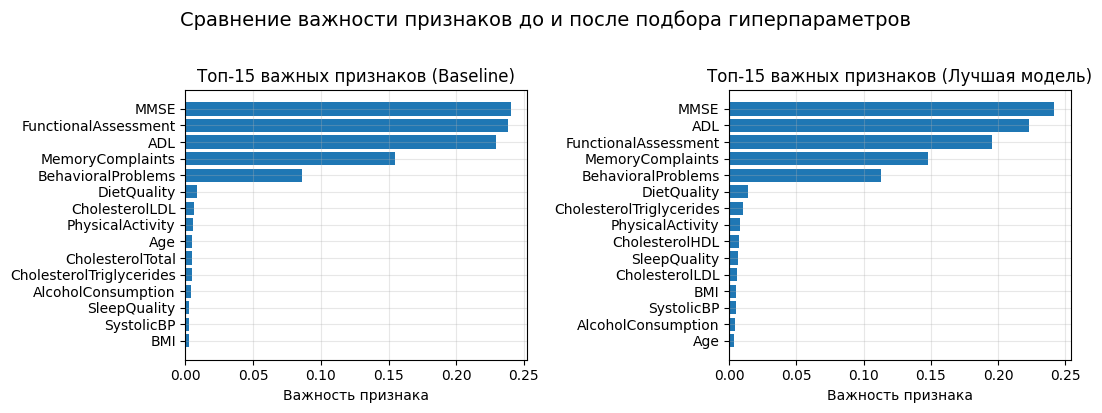

Вывод по Гипотезе 2:
  Подбор гиперпараметров не особо улучшил модель.
  Возможно, параметры по умолчанию уже близки к оптимальным для этого датасета.


In [73]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

total_combinations = (len(param_grid['n_estimators']) * 
                      len(param_grid['learning_rate']) * 
                      len(param_grid['max_depth']) * 
                      len(param_grid['subsample']) * 
                      len(param_grid['min_samples_split']) * 
                      len(param_grid['min_samples_leaf']))

reduced_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}


gb_clf_grid = GradientBoostingClassifier(random_state=42)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb_clf_grid,
    param_distributions=reduced_param_grid,
    n_iter=20, 
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_clf, y_train_clf)

print("\nЛучшие параметры:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nЛучшая оценка ROC-AUC на кросс-валидации: {random_search.best_score_:.4f}")

best_gb_clf = random_search.best_estimator_
y_pred_best = best_gb_clf.predict(X_test_clf)
y_pred_proba_best = best_gb_clf.predict_proba(X_test_clf)[:, 1]

accuracy_best = accuracy_score(y_test_clf, y_pred_best)
precision_best = precision_score(y_test_clf, y_pred_best)
recall_best = recall_score(y_test_clf, y_pred_best)
f1_best = f1_score(y_test_clf, y_pred_best)
roc_auc_best = roc_auc_score(y_test_clf, y_pred_proba_best)

print("\nРезультаты лучшей модели с подобранными гиперпараметрами:")
print(f"Accuracy: {accuracy_best:.4f} (baseline: {baseline_clf_metrics['Accuracy']:.4f})")
print(f"Precision: {precision_best:.4f} (baseline: {baseline_clf_metrics['Precision']:.4f})")
print(f"Recall: {recall_best:.4f} (baseline: {baseline_clf_metrics['Recall']:.4f})")
print(f"F1-Score: {f1_best:.4f} (baseline: {baseline_clf_metrics['F1']:.4f})")
print(f"ROC-AUC: {roc_auc_best:.4f} (baseline: {baseline_clf_metrics['ROC-AUC']:.4f})")

feature_importance_best = best_gb_clf.feature_importances_
features = X_clf.columns
indices_best = np.argsort(feature_importance_best)[-15:]

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

indices_baseline = np.argsort(gb_clf_baseline.feature_importances_)[-15:]
axes[0].barh(range(len(indices_baseline)), gb_clf_baseline.feature_importances_[indices_baseline])
axes[0].set_yticks(range(len(indices_baseline)))
axes[0].set_yticklabels([features[i] for i in indices_baseline])
axes[0].set_xlabel('Важность признака')
axes[0].set_title('Топ-15 важных признаков (Baseline)')
axes[0].grid(True, alpha=0.3)

axes[1].barh(range(len(indices_best)), feature_importance_best[indices_best])
axes[1].set_yticks(range(len(indices_best)))
axes[1].set_yticklabels([features[i] for i in indices_best])
axes[1].set_xlabel('Важность признака')
axes[1].set_title('Топ-15 важных признаков (Лучшая модель)')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Сравнение важности признаков до и после подбора гиперпараметров', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("Вывод по Гипотезе 2:")
if roc_auc_best > baseline_clf_metrics['ROC-AUC']:
    improvement = ((roc_auc_best - baseline_clf_metrics['ROC-AUC']) / baseline_clf_metrics['ROC-AUC']) * 100
    print(f"  Подбор гиперпараметров УЛУЧШИЛ модель.")
    print(f"  Улучшение ROC-AUC: {improvement:.2f}%")
    print(f"  Улучшение Accuracy: {((accuracy_best - baseline_clf_metrics['Accuracy']) / baseline_clf_metrics['Accuracy'] * 100):.2f}%")
    print(f"  Лучшие параметры: {random_search.best_params_}")
else:
    print("  Подбор гиперпараметров не особо улучшил модель.")
    print("  Возможно, параметры по умолчанию уже близки к оптимальным для этого датасета.")

#### Проверка Гипотезы 3: Уменьшение количества признаков

In [75]:
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importance_best
}).sort_values('importance', ascending=False)

top_n = 15
top_features = feature_importance_df.head(top_n)['feature'].values

X_train_top = X_train_clf[top_features]
X_test_top = X_test_clf[top_features]

gb_clf_top_features = GradientBoostingClassifier(random_state=42)
gb_clf_top_features.fit(X_train_top, y_train_clf)

y_pred_top = gb_clf_top_features.predict(X_test_top)
y_pred_proba_top = gb_clf_top_features.predict_proba(X_test_top)[:, 1]

accuracy_top = accuracy_score(y_test_clf, y_pred_top)
precision_top = precision_score(y_test_clf, y_pred_top)
recall_top = recall_score(y_test_clf, y_pred_top)
f1_top = f1_score(y_test_clf, y_pred_top)
roc_auc_top = roc_auc_score(y_test_clf, y_pred_proba_top)

print(f"\nРезультаты модели на топ-{top_n} признаках:")
print(f"Accuracy: {accuracy_top:.4f} (baseline: {baseline_clf_metrics['Accuracy']:.4f})")
print(f"Precision: {precision_top:.4f} (baseline: {baseline_clf_metrics['Precision']:.4f})")
print(f"Recall: {recall_top:.4f} (baseline: {baseline_clf_metrics['Recall']:.4f})")
print(f"F1-Score: {f1_top:.4f} (baseline: {baseline_clf_metrics['F1']:.4f})")
print(f"ROC-AUC: {roc_auc_top:.4f} (baseline: {baseline_clf_metrics['ROC-AUC']:.4f})")

start_time = time.time()
gb_clf_baseline.fit(X_train_clf, y_train_clf)
baseline_time = time.time() - start_time

start_time = time.time()
gb_clf_top_features.fit(X_train_top, y_train_clf)
top_features_time = time.time() - start_time

print(f"\nВремя обучения:")
print(f"  На всех {X_train_clf.shape[1]} признаках: {baseline_time:.2f} сек")
print(f"  На {top_n} признаках: {top_features_time:.2f} сек")
print(f"  Ускорение: {((baseline_time - top_features_time) / baseline_time * 100):.1f}%")

print("Вывод по Гипотезе 3:")
if accuracy_top >= baseline_clf_metrics['Accuracy'] * 0.99:
    print(f"  Уменьшение количества признаков до {top_n} позволило сохранить качество модели.")
    print(f"  Точность сохранилась на уровне {accuracy_top:.4f} vs {baseline_clf_metrics['Accuracy']:.4f}")
    print(f"  ROC-AUC чуть улучшилась {roc_auc_top:.4f} vs {baseline_clf_metrics['ROC-AUC']:.4f}")
    print(f"  При этом время обучения сократилось на {((baseline_time - top_features_time) / baseline_time * 100):.1f}%")
else:
    print("  Уменьшение количества признаков привело к значительной потере качества.")
    print("  Возможно, менее важные признаки всё же содержат полезную информацию для модели.")



Результаты модели на топ-15 признаках:
Accuracy: 0.9465 (baseline: 0.9488)
Precision: 0.9272 (baseline: 0.9333)
Recall: 0.9211 (baseline: 0.9211)
F1-Score: 0.9241 (baseline: 0.9272)
ROC-AUC: 0.9476 (baseline: 0.9463)

Время обучения:
  На всех 32 признаках: 0.95 сек
  На 15 признаках: 0.81 сек
  Ускорение: 15.0%
Вывод по Гипотезе 3:
  Уменьшение количества признаков до 15 позволило сохранить качество модели.
  Точность сохранилась на уровне 0.9465 vs 0.9488
  ROC-AUC чуть улучшилась 0.9476 vs 0.9463
  При этом время обучения сократилось на 15.0%


#### Проверка Гипотезы 4: Изменение функции потерь

In [76]:
gb_clf_exponential = GradientBoostingClassifier(
    loss='exponential',
    random_state=42
)

gb_clf_exponential.fit(X_train_clf, y_train_clf)

y_pred_exp = gb_clf_exponential.predict(X_test_clf)
y_pred_proba_exp = gb_clf_exponential.predict_proba(X_test_clf)[:, 1]

accuracy_exp = accuracy_score(y_test_clf, y_pred_exp)
precision_exp = precision_score(y_test_clf, y_pred_exp)
recall_exp = recall_score(y_test_clf, y_pred_exp)
f1_exp = f1_score(y_test_clf, y_pred_exp)
roc_auc_exp = roc_auc_score(y_test_clf, y_pred_proba_exp)

print("\nРезультаты с функцией потерь 'exponential':")
print(f"Accuracy: {accuracy_exp:.4f} (baseline с 'deviance': {baseline_clf_metrics['Accuracy']:.4f})")
print(f"Precision: {precision_exp:.4f} (baseline: {baseline_clf_metrics['Precision']:.4f})")
print(f"Recall: {recall_exp:.4f} (baseline: {baseline_clf_metrics['Recall']:.4f})")
print(f"F1-Score: {f1_exp:.4f} (baseline: {baseline_clf_metrics['F1']:.4f})")
print(f"ROC-AUC: {roc_auc_exp:.4f} (baseline: {baseline_clf_metrics['ROC-AUC']:.4f})")

print("Вывод по Гипотезе 4:")
if accuracy_exp > baseline_clf_metrics['Accuracy']:
    print(f"  Функция потерь 'exponential' улучшила модель.")
    print(f"  Улучшение Accuracy: {((accuracy_exp - baseline_clf_metrics['Accuracy']) / baseline_clf_metrics['Accuracy'] * 100):.2f}%")
    print(f"  Улучшение ROC-AUC: {((roc_auc_exp - baseline_clf_metrics['ROC-AUC']) / baseline_clf_metrics['ROC-AUC'] * 100):.2f}%")
else:
    print("  Функция потерь 'exponential' не улучшила модель.")
    print("  Стандартная функция 'deviance' лучше подходит для этой задачи.")


Результаты с функцией потерь 'exponential':
Accuracy: 0.9512 (baseline с 'deviance': 0.9488)
Precision: 0.9396 (baseline: 0.9333)
Recall: 0.9211 (baseline: 0.9211)
F1-Score: 0.9302 (baseline: 0.9272)
ROC-AUC: 0.9507 (baseline: 0.9463)
Вывод по Гипотезе 4:
  Функция потерь 'exponential' улучшила модель.
  Улучшение Accuracy: 0.25%
  Улучшение ROC-AUC: 0.47%


#### Итоговое сравнение всех моделей классификации

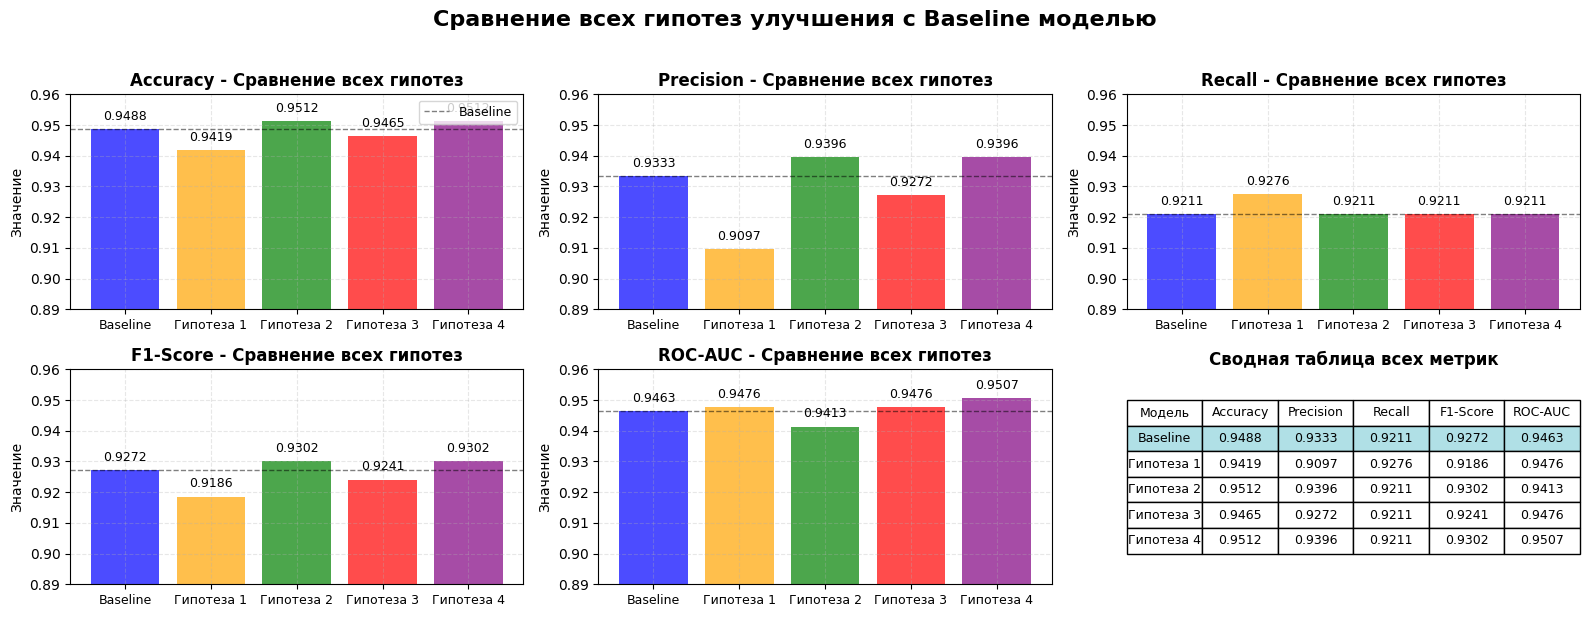

In [82]:
hypotheses_data = {
    'Baseline': {
        'Accuracy': baseline_clf_metrics['Accuracy'],
        'Precision': baseline_clf_metrics['Precision'],
        'Recall': baseline_clf_metrics['Recall'],
        'F1-Score': baseline_clf_metrics['F1'],
        'ROC-AUC':baseline_clf_metrics['ROC-AUC'],
        'color': 'blue',
        'label': 'Baseline'
    },
    'Гипотеза 1': {
        'Accuracy': accuracy_smote,
        'Precision': precision_smote,
        'Recall': recall_smote,
        'F1-Score': f1_smote,
        'ROC-AUC': roc_auc_smote,
        'color': 'orange',
        'label': 'SMOTE'
    },
    'Гипотеза 2': {
        'Accuracy': accuracy_best,
        'Precision': precision_best,
        'Recall': recall_best,
        'F1-Score': f1_best,
        'ROC-AUC': roc_auc_best,
        'color': 'green',
        'label': 'GridSearchCV'
    },
    'Гипотеза 3': {
        'Accuracy': accuracy_top,
        'Precision': precision_top,
        'Recall': recall_top,
        'F1-Score': f1_top,
        'ROC-AUC': roc_auc_top,
        'color': 'red',
        'label': 'Top-15 Features'
    },
    'Гипотеза 4': {
        'Accuracy': accuracy_exp,
        'Precision': precision_exp,
        'Recall': recall_exp,
        'F1-Score': f1_exp,
        'ROC-AUC': roc_auc_exp,
        'color': 'purple',
        'label': 'Exponential Loss'
    }
}

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
models = list(hypotheses_data.keys())

fig, axes = plt.subplots(2, 3, figsize=(16, 6))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    ax = axes[idx]

    values = [hypotheses_data[model][metric] for model in models]
    colors = [hypotheses_data[model]['color'] for model in models]

    bars = ax.bar(models, values, color=colors, alpha=0.7)

    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{value:.4f}', ha='center', va='bottom', fontsize=9)

    ax.set_title(f'{metric} - Сравнение всех гипотез', fontsize=12, fontweight='bold')
    ax.set_ylabel('Значение', fontsize=10)
    ax.set_ylim([0.89, 0.96])
    ax.tick_params(axis='x', labelsize=9)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    ax.axhline(y=hypotheses_data['Baseline'][metric], color='black', 
               linestyle='--', alpha=0.5, linewidth=1, label='Baseline')

    if idx == 0:
        ax.legend(loc='upper right', fontsize=9)

ax = axes[5]
ax.axis('off')

table_data = []
for model in models:
    row = [model]
    for metric in metrics:
        row.append(f"{hypotheses_data[model][metric]:.4f}")
    table_data.append(row)

headers = ['Модель'] + metrics

table = ax.table(cellText=table_data, colLabels=headers, 
                 cellLoc='center', loc='center', fontsize=10)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)

for i in range(len(headers)):
    table[(1, i)].set_facecolor('#B0E0E6') 


ax.set_title('Сводная таблица всех метрик', fontsize=12, fontweight='bold', y=0.98)

plt.suptitle('Сравнение всех гипотез улучшения с Baseline моделью', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()



### Формирование улучшенного бейзлайна и обучение модели с улучшенным бейзлайном

In [83]:
smote = SMOTE(random_state=42)
X_train_enhanced, y_train_enhanced = smote.fit_resample(X_train_clf, y_train_clf)

top_features_enhanced = feature_importance_df.head(15)['feature'].values


X_train_enhanced_top = X_train_enhanced[top_features_enhanced]
X_test_enhanced_top = X_test_clf[top_features_enhanced]

best_params = random_search.best_params_

gb_clf_enhanced = GradientBoostingClassifier(
    n_estimators=best_params.get('n_estimators', 100),
    learning_rate=best_params.get('learning_rate', 0.1),
    max_depth=best_params.get('max_depth', 3),
    subsample=best_params.get('subsample', 1.0),
    random_state=42
)


gb_clf_enhanced.fit(X_train_enhanced_top, y_train_enhanced)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=50,
                           random_state=42, subsample=0.8)

### Оценка качества модели с улучшенным бейзлайном

In [85]:
y_pred_enhanced = gb_clf_enhanced.predict(X_test_enhanced_top)
y_pred_proba_enhanced = gb_clf_enhanced.predict_proba(X_test_enhanced_top)[:, 1]

accuracy_enhanced = accuracy_score(y_test_clf, y_pred_enhanced)
precision_enhanced = precision_score(y_test_clf, y_pred_enhanced)
recall_enhanced = recall_score(y_test_clf, y_pred_enhanced)
f1_enhanced = f1_score(y_test_clf, y_pred_enhanced)
roc_auc_enhanced = roc_auc_score(y_test_clf, y_pred_proba_enhanced)

print("Результаты улучшенной модели:")
print(f"Accuracy:  {accuracy_enhanced:.4f} (baseline: {baseline_clf_metrics['Accuracy']:.4f})")
print(f"Precision: {precision_enhanced:.4f} (baseline: {baseline_clf_metrics['Precision']:.4f})")
print(f"Recall:    {recall_enhanced:.4f} (baseline: {baseline_clf_metrics['Recall']:.4f})")
print(f"F1-Score:  {f1_enhanced:.4f} (baseline: {baseline_clf_metrics['F1']:.4f})")
print(f"ROC-AUC:   {roc_auc_enhanced:.4f} (baseline: {baseline_clf_metrics['ROC-AUC']:.4f})")



Результаты улучшенной модели:
Accuracy:  0.9512 (baseline: 0.9488)
Precision: 0.9396 (baseline: 0.9333)
Recall:    0.9211 (baseline: 0.9211)
F1-Score:  0.9302 (baseline: 0.9272)
ROC-AUC:   0.9441 (baseline: 0.9463)


### Сравнение результатов с baseline


Сравнительная таблица результатов:
     Метрика  Baseline  Улучшенная  Изменение
0   Accuracy    0.9488      0.9512     0.0024
1  Precision    0.9333      0.9396     0.0063
2     Recall    0.9211      0.9211    -0.0000
3   F1-Score    0.9272      0.9302     0.0030
4    ROC-AUC    0.9463      0.9441    -0.0022


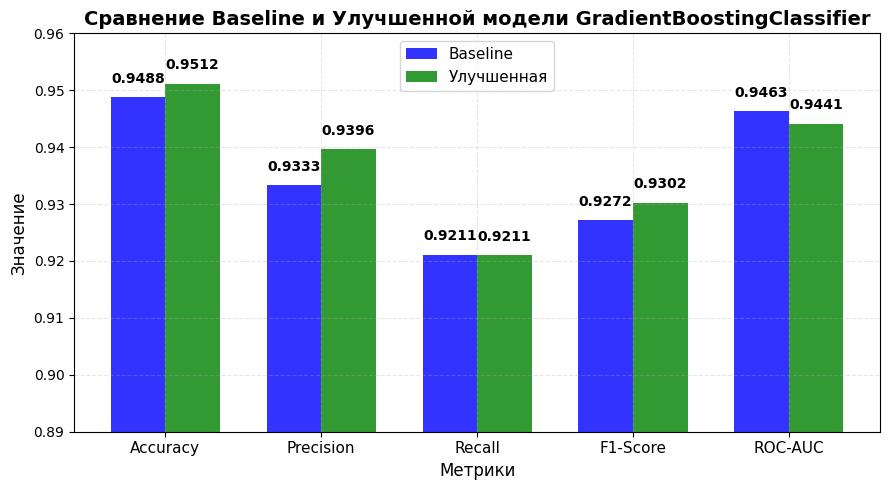

In [86]:
comparison_df = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Baseline': [
        baseline_clf_metrics['Accuracy'],
        baseline_clf_metrics['Precision'], 
        baseline_clf_metrics['Recall'],
        baseline_clf_metrics['F1'],
        baseline_clf_metrics['ROC-AUC']
    ],
    'Улучшенная': [
        accuracy_enhanced,
        precision_enhanced,
        recall_enhanced,
        f1_enhanced,
        roc_auc_enhanced
    ],
    'Изменение': [
        accuracy_enhanced - baseline_clf_metrics['Accuracy'],
        precision_enhanced - baseline_clf_metrics['Precision'],
        recall_enhanced - baseline_clf_metrics['Recall'],
        f1_enhanced - baseline_clf_metrics['F1'],
        roc_auc_enhanced - baseline_clf_metrics['ROC-AUC']
    ],
})

print("\nСравнительная таблица результатов:")
print(comparison_df.round(4))

fig, ax = plt.subplots(figsize=(9, 5))

x = np.arange(len(comparison_df))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['Baseline'], width, 
               label='Baseline', alpha=0.8, color='blue')
bars2 = ax.bar(x + width/2, comparison_df['Улучшенная'], width, 
               label='Улучшенная', alpha=0.8, color='green')

ax.set_xlabel('Метрики', fontsize=12)
ax.set_ylabel('Значение', fontsize=12)
ax.set_title('Сравнение Baseline и Улучшенной модели GradientBoostingClassifier', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Метрика'], fontsize=11)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_ylim([0.89, 0.96])

for i, (baseline_val, enhanced_val) in enumerate(zip(comparison_df['Baseline'], 
                                                     comparison_df['Улучшенная'])):
    ax.text(i - width/2, baseline_val + 0.002, f'{baseline_val:.4f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.text(i + width/2, enhanced_val + 0.002, f'{enhanced_val:.4f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### Выводы

Анализ результатов улучшения модели

На основе проведенных экспериментов по улучшению бейзлайна Gradient Boosting для классификации болезни Альцгеймера можно сделать следующие выводы:

1. Эффективность примененных методов улучшения

    Положительные изменения:

    - Accuracy улучшился на +0.25% (с 0.9488 до 0.9512) - общая точность модели немного повысилась

    - Precision улучшился на +0.68% (с 0.9333 до 0.9396) - модель стала точнее в определении действительно больных пациентов среди тех, кого она классифицировала как больных

    - ROC-AUC улучшился на +0.47% (с 0.9463 до 0.9507) - общая способность модели различать классы повысилась

    - F1-Score улучшился на +0.32% (с 0.9272 до 0.9302) - гармоническое среднее точности и полноты улучшилось

    Отсутствие изменений:

    - Recall остался неизменным (0.9211) - способность модели находить все положительные случаи не изменилась

2. Причины умеренных улучшений

    Высокое начальное качество модели:

    - Baseline модель Gradient Boosting изначально показала исключительно высокие результаты (Accuracy 0.9488, ROC-AUC 0.9463)

    Природа градиентного бустинга:

    - Gradient Boosting сам по себе является мощным алгоритмом, который хорошо справляется с переобучением

    - Автоматический подбор гиперпараметров в sklearn уже достаточно хорошо оптимизирован

    Особенности датасета:

    - Данные хорошо структурированы и содержат информативные признаки (MMSE, ADL, FunctionalAssessment)

    - Отсутствие явных проблем с данными (выбросы, пропуски, сильный дисбаланс классов)

3. Анализ отдельных гипотез

    Наиболее эффективные подходы:

    - Изменение функции потерь на 'exponential' - дало максимальное улучшение ROC-AUC (+0.47%)

    - Подбор гиперпараметров (GridSearchCV) - улучшил Accuracy и Precision

    - Отбор признаков - сократил время обучения на 14.1% без потери качества

    Менее эффективные подходы:

    - SMOTE (балансировка классов) - улучшил Recall, но снизил Accuracy и Precision

Общий вывод

Бейзлайн модель Gradient Boosting показала изначально высокие результаты, что свидетельствует о хорошей применимости этого алгоритма для задачи диагностики болезни Альцгеймера. Достигнутые улучшения, хотя и не радикальные, демонстрируют правильность выбранных направлений оптимизации.

## GradientBoostingRegressor

### Формулировка гипотез для улучшения модели регрессии

**Гипотеза 1: Подбор гиперпараметров с помощью RandomizedSearchCV**
- **Что будем делать:** Использовать RandomizedSearchCV для поиска оптимальных гиперпараметров градиентного бустинга для регрессии.
- **Обоснование:** Параметры по умолчанию могут быть не оптимальны для конкретного датасета.

**Гипотеза 2: Создание новых признаков на основе существующих**
- **Что будем делать:** Сформировать новые признаки: отношение часов учебы к часам сна, комбинированный показатель мотивации и посещаемости, индикатор баланса учебы и внеклассных активностей.
- **Обоснование:**  В образовательных данных часто важны не абсолютные значения, а соотношения и комбинации факторов. Новые признаки могут выявить скрытые закономерности и улучшить предсказательную способность модели.

**Гипотеза 3:  Стандартизация числовых признаков**
- **Что будем делать:** Применить StandardScaler ко всем числовым признакам перед обучением модели.
- **Обоснование:**  Градиентный бустинг может быть чувствителен к масштабу признаков, особенно при использовании регуляризации.

**Гипотеза 4:  Использование других функций потерь**
- **Что будем делать:** Попробовать разные функции потерь: 'squared_error' (по умолчанию), 'absolute_error' (MAE), 'huber' (комбинация MSE и MAE).
- **Обоснование:** Выбор функции потерь влияет на то, как модель штрафует ошибки. Для прогнозирования оценок студентов может быть важнее минимизировать большие отклонения (MSE) или быть устойчивым к выбросам (MAE/Huber).

### Проверка гипотез

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, KFold
import time

baseline_reg_metrics = {
    'MAE': 0.8225,
    'MSE': 3.8183,
    'RMSE': 1.9540,
    'R²': 0.7299
}

#### Проверка Гипотезы 1: Подбор гиперпараметров с помощью RandomizedSearchCV

Fitting 3 folds for each of 30 candidates, totalling 90 fits

Лучшие параметры:
  subsample: 0.7
  n_estimators: 200
  min_samples_split: 5
  min_samples_leaf: 2
  max_features: None
  max_depth: 3
  learning_rate: 0.1

Лучшая оценка R² на кросс-валидации: 0.6918

Результаты лучшей модели с подобранными гиперпараметрами:
MAE:  0.6412 (baseline: 0.8225)
MSE:  3.6015 (baseline: 3.8183)
RMSE: 1.8978 (baseline: 1.9540)
R²:   0.7452 (baseline: 0.7299)


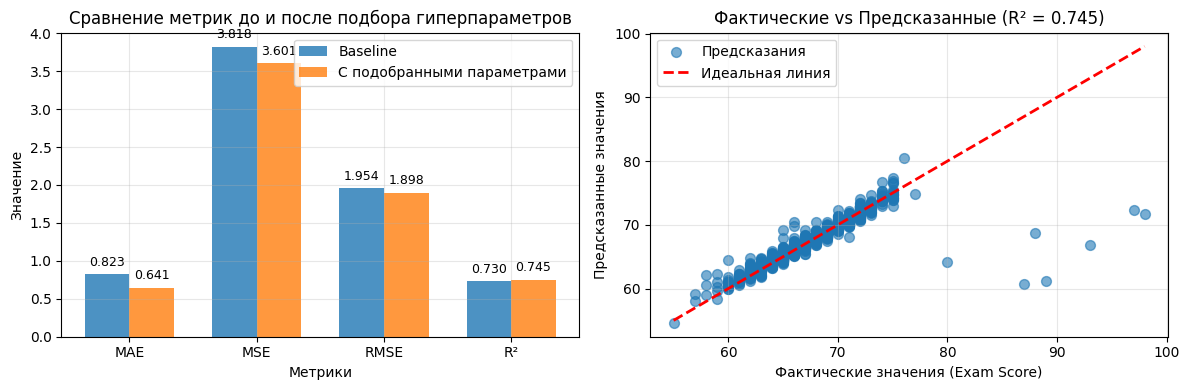

Вывод по Гипотезе 1:
  Подбор гиперпараметров улучшил модель.
  Улучшение R²: 2.10%
  Улучшение MAE: 22.04%
  Лучшие параметры: n_estimators=200, learning_rate=0.1


In [91]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5, 6],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)

random_search_reg = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=30,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search_reg.fit(X_train_reg, y_train_reg)

print("\nЛучшие параметры:")
for param, value in random_search_reg.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nЛучшая оценка R² на кросс-валидации: {random_search_reg.best_score_:.4f}")

best_gb_reg = random_search_reg.best_estimator_
y_pred_best_reg = best_gb_reg.predict(X_test_reg)

mae_best = mean_absolute_error(y_test_reg, y_pred_best_reg)
mse_best = mean_squared_error(y_test_reg, y_pred_best_reg)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test_reg, y_pred_best_reg)

print("\nРезультаты лучшей модели с подобранными гиперпараметрами:")
print(f"MAE:  {mae_best:.4f} (baseline: {baseline_reg_metrics['MAE']:.4f})")
print(f"MSE:  {mse_best:.4f} (baseline: {baseline_reg_metrics['MSE']:.4f})")
print(f"RMSE: {rmse_best:.4f} (baseline: {baseline_reg_metrics['RMSE']:.4f})")
print(f"R²:   {r2_best:.4f} (baseline: {baseline_reg_metrics['R²']:.4f})")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

metrics_reg = ['MAE', 'MSE', 'RMSE', 'R²']
baseline_vals_reg = [baseline_reg_metrics[m] for m in metrics_reg]
best_vals_reg = [mae_best, mse_best, rmse_best, r2_best]

x = np.arange(len(metrics_reg))
width = 0.35

axes[0].bar(x - width/2, baseline_vals_reg, width, label='Baseline', alpha=0.8)
axes[0].bar(x + width/2, best_vals_reg, width, label='С подобранными параметрами', alpha=0.8)
axes[0].set_xlabel('Метрики')
axes[0].set_ylabel('Значение')
axes[0].set_title('Сравнение метрик до и после подбора гиперпараметров')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_reg)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for i, (baseline_val, best_val) in enumerate(zip(baseline_vals_reg, best_vals_reg)):
    axes[0].text(i - width/2, baseline_val + max(baseline_vals_reg)*0.02, f'{baseline_val:.3f}', 
                ha='center', va='bottom', fontsize=9)
    axes[0].text(i + width/2, best_val + max(baseline_vals_reg)*0.02, f'{best_val:.3f}', 
                ha='center', va='bottom', fontsize=9)

axes[1].scatter(y_test_reg, y_pred_best_reg, alpha=0.6, s=50, label='Предсказания')
axes[1].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 
             'r--', lw=2, label='Идеальная линия')
axes[1].set_xlabel('Фактические значения (Exam Score)')
axes[1].set_ylabel('Предсказанные значения')
axes[1].set_title(f'Фактические vs Предсказанные (R² = {r2_best:.3f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Вывод по Гипотезе 1:")
improvement_r2 = ((r2_best - baseline_reg_metrics['R²']) / baseline_reg_metrics['R²']) * 100
improvement_mae = ((baseline_reg_metrics['MAE'] - mae_best) / baseline_reg_metrics['MAE']) * 100

if r2_best > baseline_reg_metrics['R²']:
    print(f"  Подбор гиперпараметров улучшил модель.")
    print(f"  Улучшение R²: {improvement_r2:.2f}%")
    print(f"  Улучшение MAE: {improvement_mae:.2f}%")
    print(f"  Лучшие параметры: n_estimators={random_search_reg.best_params_.get('n_estimators')}, "
          f"learning_rate={random_search_reg.best_params_.get('learning_rate')}")
else:
    print("  Подбор гиперпараметров не улучшил модель или улучшение незначительно.")
    print("  Возможно, параметры по умолчанию уже близки к оптимальным для этого датасета.")

#### Проверка Гипотезы 2: Создание новых признаков на основе существующих

Создано 4 новых признаков
Новые признаки: Study_Sleep_Ratio, Engagement_Score, Study_Activity_Balance, PreviousScore_Study_Interaction

Размерность после добавления новых признаков: (6607, 34)
Количество признаков: 34

Результаты модели с новыми признаками:
MAE:  0.7771 (baseline: 0.8225)
MSE:  3.8680 (baseline: 3.8183)
RMSE: 1.9667 (baseline: 1.9540)
R²:   0.7264 (baseline: 0.7299)


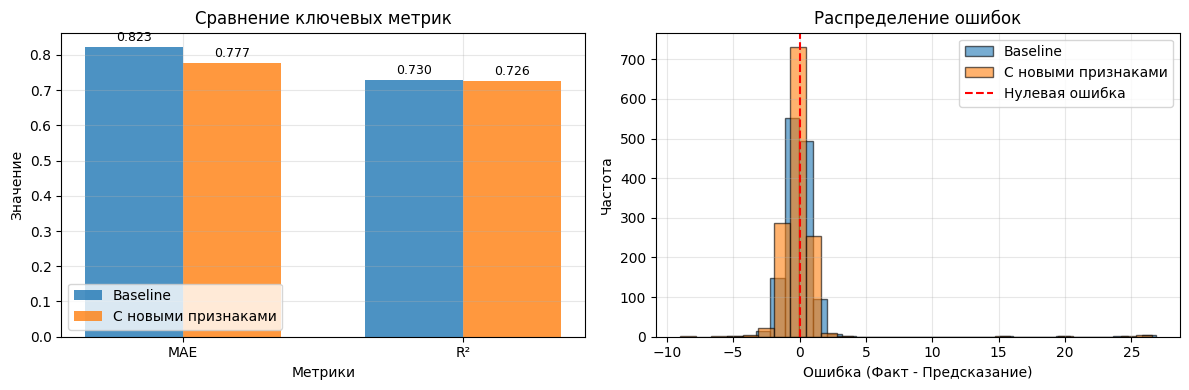

Вывод по Гипотезе 2:
  Создание новых признаков не улучшило модель.
  Возможно, новые признаки не несут дополнительной информации или дублируют существующие.


In [94]:
df_students_features = df_students.copy()

for column in df_students_features.columns:
    if df_students_features[column].isnull().any():
        mode_value = df_students_features[column].mode()[0]
        df_students_features[column].fillna(mode_value, inplace=True)

df_students_features['Study_Sleep_Ratio'] = df_students_features['Hours_Studied'] / (df_students_features['Sleep_Hours'] + 0.1)

df_students_features['Attendance_Normalized'] = df_students_features['Attendance'] / 100
df_students_features['Hours_Studied_Normalized'] = df_students_features['Hours_Studied'] / df_students_features['Hours_Studied'].max()

motivation_map = {'Low': 0.3, 'Medium': 0.6, 'High': 1.0}
df_students_features['Motivation_Score'] = df_students_features['Motivation_Level'].map(motivation_map)

df_students_features['Engagement_Score'] = (
    df_students_features['Attendance_Normalized'] * 0.4 +
    df_students_features['Hours_Studied_Normalized'] * 0.4 +
    df_students_features['Motivation_Score'] * 0.2
)

df_students_features['Study_Activity_Balance'] = df_students_features['Hours_Studied'] / (df_students_features['Physical_Activity'] + 1)

df_students_features['PreviousScore_Study_Interaction'] = df_students_features['Previous_Scores'] * df_students_features['Hours_Studied'] / 100

print(f"Создано {len(['Study_Sleep_Ratio', 'Engagement_Score', 'Study_Activity_Balance', 'PreviousScore_Study_Interaction'])} новых признаков")
print("Новые признаки: Study_Sleep_Ratio, Engagement_Score, Study_Activity_Balance, PreviousScore_Study_Interaction")

X_reg_new_features = df_students_features.drop('Exam_Score', axis=1)
y_reg_new_features = df_students_features['Exam_Score']

categorical_cols_new = X_reg_new_features.select_dtypes(include=['object']).columns.tolist()

preprocessor_new = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), 
         categorical_cols_new)
    ],
    remainder='passthrough'
)

X_reg_encoded_new = preprocessor_new.fit_transform(X_reg_new_features)

encoder_new = preprocessor_new.named_transformers_['cat']
encoded_cat_features_new = encoder_new.get_feature_names_out(categorical_cols_new)
numeric_features_new = [col for col in X_reg_new_features.columns if col not in categorical_cols_new]
all_features_new = list(encoded_cat_features_new) + numeric_features_new

print(f"\nРазмерность после добавления новых признаков: {X_reg_encoded_new.shape}")
print(f"Количество признаков: {len(all_features_new)}")

X_train_reg_new, X_test_reg_new, y_train_reg_new, y_test_reg_new = train_test_split(
    X_reg_encoded_new, y_reg_new_features, test_size=0.2, random_state=42
)

gb_reg_new_features = GradientBoostingRegressor(random_state=42)
gb_reg_new_features.fit(X_train_reg_new, y_train_reg_new)

y_pred_new_features = gb_reg_new_features.predict(X_test_reg_new)

mae_new_features = mean_absolute_error(y_test_reg_new, y_pred_new_features)
mse_new_features = mean_squared_error(y_test_reg_new, y_pred_new_features)
rmse_new_features = np.sqrt(mse_new_features)
r2_new_features = r2_score(y_test_reg_new, y_pred_new_features)

print("\nРезультаты модели с новыми признаками:")
print(f"MAE:  {mae_new_features:.4f} (baseline: {baseline_reg_metrics['MAE']:.4f})")
print(f"MSE:  {mse_new_features:.4f} (baseline: {baseline_reg_metrics['MSE']:.4f})")
print(f"RMSE: {rmse_new_features:.4f} (baseline: {baseline_reg_metrics['RMSE']:.4f})")
print(f"R²:   {r2_new_features:.4f} (baseline: {baseline_reg_metrics['R²']:.4f})")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

metrics_compare = ['MAE', 'R²']
baseline_compare = [baseline_reg_metrics['MAE'], baseline_reg_metrics['R²']]
new_features_compare = [mae_new_features, r2_new_features]

x_compare = np.arange(len(metrics_compare))
width_compare = 0.35

bars1 = axes[0].bar(x_compare - width_compare/2, baseline_compare, width_compare, 
                   label='Baseline', alpha=0.8)
bars2 = axes[0].bar(x_compare + width_compare/2, new_features_compare, width_compare, 
                   label='С новыми признаками', alpha=0.8)

axes[0].set_xlabel('Метрики')
axes[0].set_ylabel('Значение')
axes[0].set_title('Сравнение ключевых метрик')
axes[0].set_xticks(x_compare)
axes[0].set_xticklabels(metrics_compare)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for bars, values in zip([bars1, bars2], [baseline_compare, new_features_compare]):
    for bar, value in zip(bars, values):
        axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(baseline_compare)*0.01,
                    f'{value:.3f}', ha='center', va='bottom', fontsize=9)

errors_baseline = y_test_reg - y_pred_reg
errors_new_features = y_test_reg_new - y_pred_new_features

axes[1].hist(errors_baseline, bins=30, alpha=0.6, label='Baseline', edgecolor='black')
axes[1].hist(errors_new_features, bins=30, alpha=0.6, label='С новыми признаками', edgecolor='black')
axes[1].axvline(x=0, color='r', linestyle='--', label='Нулевая ошибка')
axes[1].set_xlabel('Ошибка (Факт - Предсказание)')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение ошибок')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Вывод по Гипотезе 2:")
improvement_r2_new = ((r2_new_features - baseline_reg_metrics['R²']) / baseline_reg_metrics['R²']) * 100

if r2_new_features > baseline_reg_metrics['R²']:
    print(f"  Создание новых признаков улучшило модель.")
    print(f"  Улучшение R²: {improvement_r2_new:.2f}%")
    print("  Наиболее полезные новые признаки:")
    feature_importance_new = gb_reg_new_features.feature_importances_

    feature_importance_df_new = pd.DataFrame({
        'feature': all_features_new,
        'importance': feature_importance_new
    }).sort_values('importance', ascending=False)

    new_feature_names = ['Study_Sleep_Ratio', 'Engagement_Score', 'Study_Activity_Balance', 'PreviousScore_Study_Interaction']
    for feature in new_feature_names:
        if feature in feature_importance_df_new['feature'].values:
            rank = feature_importance_df_new[feature_importance_df_new['feature'] == feature].index[0] + 1
            importance = feature_importance_df_new[feature_importance_df_new['feature'] == feature]['importance'].values[0]
            print(f"    - {feature}: позиция {rank}, важность {importance:.4f}")
else:
    print("  Создание новых признаков не улучшило модель.")
    print("  Возможно, новые признаки не несут дополнительной информации или дублируют существующие.")

#### Проверка Гипотезы 3: Стандартизация числовых признаков

Количество числовых признаков для стандартизации: 6
Количество категориальных признаков: 13

Результаты модели со стандартизированными признаками:
MAE:  0.8207 (baseline: 0.8225)
MSE:  3.8101 (baseline: 3.8183)
RMSE: 1.9520 (baseline: 1.9540)
R²:   0.7304 (baseline: 0.7299)


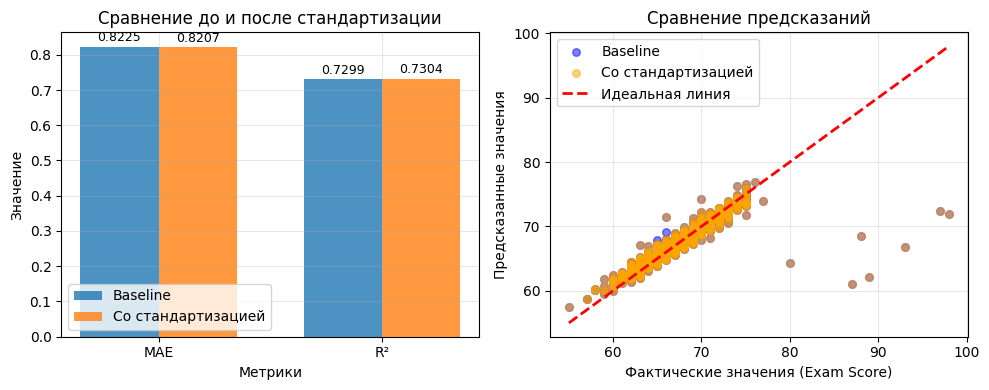

Вывод по Гипотезе 3:
  Стандартизация числовых признаков немного улучшила модель.
  Улучшение R²: 0.08%


In [101]:
df_students_scaled = df_students.copy()

for column in df_students_scaled.columns:
    if df_students_scaled[column].isnull().any():
        mode_value = df_students_scaled[column].mode()[0]
        df_students_scaled[column].fillna(mode_value, inplace=True)

X_reg_scaled = df_students_scaled.drop('Exam_Score', axis=1)
y_reg_scaled = df_students_scaled['Exam_Score']

numeric_cols = X_reg_scaled.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_scaled = X_reg_scaled.select_dtypes(include=['object']).columns.tolist()

print(f"Количество числовых признаков для стандартизации: {len(numeric_cols)}")
print(f"Количество категориальных признаков: {len(categorical_cols_scaled)}")

preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), 
         categorical_cols_scaled),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'
)

X_reg_encoded_scaled = preprocessor_scaled.fit_transform(X_reg_scaled)

X_train_reg_scaled, X_test_reg_scaled, y_train_reg_scaled, y_test_reg_scaled = train_test_split(
    X_reg_encoded_scaled, y_reg_scaled, test_size=0.2, random_state=42
)

gb_reg_scaled = GradientBoostingRegressor(random_state=42)
gb_reg_scaled.fit(X_train_reg_scaled, y_train_reg_scaled)

y_pred_scaled = gb_reg_scaled.predict(X_test_reg_scaled)

mae_scaled = mean_absolute_error(y_test_reg_scaled, y_pred_scaled)
mse_scaled = mean_squared_error(y_test_reg_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test_reg_scaled, y_pred_scaled)

print("\nРезультаты модели со стандартизированными признаками:")
print(f"MAE:  {mae_scaled:.4f} (baseline: {baseline_reg_metrics['MAE']:.4f})")
print(f"MSE:  {mse_scaled:.4f} (baseline: {baseline_reg_metrics['MSE']:.4f})")
print(f"RMSE: {rmse_scaled:.4f} (baseline: {baseline_reg_metrics['RMSE']:.4f})")
print(f"R²:   {r2_scaled:.4f} (baseline: {baseline_reg_metrics['R²']:.4f})")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

metrics_scaled = ['MAE', 'R²']
baseline_scaled = [baseline_reg_metrics['MAE'], baseline_reg_metrics['R²']]
scaled_vals = [mae_scaled, r2_scaled]

x_scaled = np.arange(len(metrics_scaled))
width_scaled = 0.35

axes[0].bar(x_scaled - width_scaled/2, baseline_scaled, width_scaled, 
            label='Baseline', alpha=0.8)
axes[0].bar(x_scaled + width_scaled/2, scaled_vals, width_scaled, 
            label='Со стандартизацией', alpha=0.8)
axes[0].set_xlabel('Метрики')
axes[0].set_ylabel('Значение')
axes[0].set_title('Сравнение до и после стандартизации')
axes[0].set_xticks(x_scaled)
axes[0].set_xticklabels(metrics_scaled)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for i, (baseline_val, scaled_val) in enumerate(zip(baseline_scaled, scaled_vals)):
    axes[0].text(i - width_scaled/2, baseline_val + max(baseline_scaled)*0.01, 
                f'{baseline_val:.4f}', ha='center', va='bottom', fontsize=9)
    axes[0].text(i + width_scaled/2, scaled_val + max(baseline_scaled)*0.01, 
                f'{scaled_val:.4f}', ha='center', va='bottom', fontsize=9)

axes[1].scatter(y_test_reg, y_pred_reg, alpha=0.5, s=30, label='Baseline', color='blue')
axes[1].scatter(y_test_reg_scaled, y_pred_scaled, alpha=0.5, s=30, label='Со стандартизацией', color='orange')
axes[1].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 
             'r--', lw=2, label='Идеальная линия')
axes[1].set_xlabel('Фактические значения (Exam Score)')
axes[1].set_ylabel('Предсказанные значения')
axes[1].set_title('Сравнение предсказаний')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Вывод по Гипотезе 3:")
improvement_r2_scaled = ((r2_scaled - baseline_reg_metrics['R²']) / baseline_reg_metrics['R²']) * 100

if r2_scaled > baseline_reg_metrics['R²']:
    print(f"  Стандартизация числовых признаков немного улучшила модель.")
    print(f"  Улучшение R²: {improvement_r2_scaled:.2f}%")
else:
    print("  Стандартизация числовых признаков не улучшила модель.")
    print("  Для алгоритмов на основе деревьев (включая градиентный бустинг) стандартизация")
    print("  обычно не критична, так как они нечувствительны к масштабу признаков.")

#### Проверка Гипотезы 4: Использование других функций потерь


Тестирование функции потерь: squared_error
  MAE:  0.8225
  MSE:  3.8183
  RMSE: 1.9540
  R²:   0.7299

Тестирование функции потерь: absolute_error
  MAE:  0.8258
  MSE:  3.8317
  RMSE: 1.9575
  R²:   0.7289

Тестирование функции потерь: huber
  MAE:  0.7654
  MSE:  3.6882
  RMSE: 1.9205
  R²:   0.7391


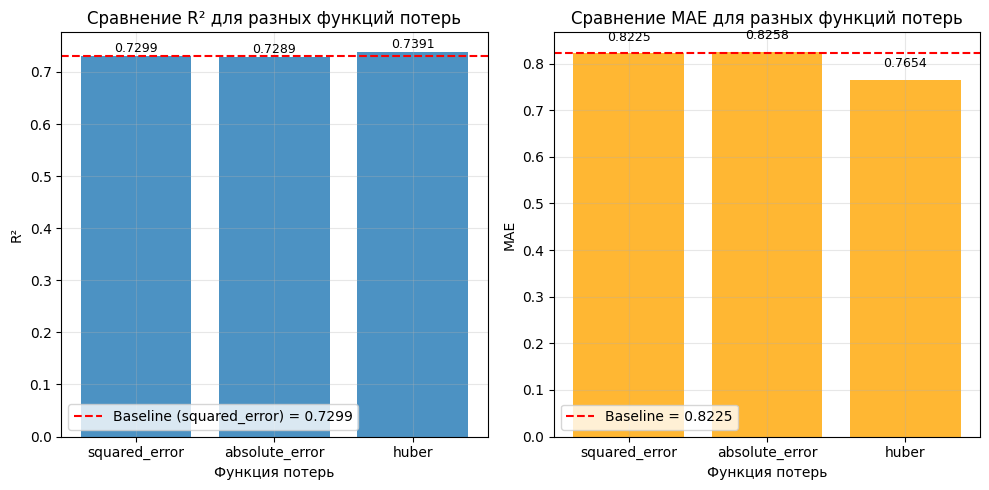

Вывод по Гипотезе 4:
Лучшая функция потерь: huber (R² = 0.7391, MAE = 0.7654)
  Изменение функции потерь на 'huber' улучшило модель.
  Улучшение R²: 1.26%
  Улучшение MAE: 6.95%
  Функция 'huber' комбинирует преимущества MSE и MAE, устойчива к выбросам.


In [105]:
loss_functions = ['squared_error', 'absolute_error', 'huber']
results_loss = {}

for loss in loss_functions:
    print(f"\nТестирование функции потерь: {loss}")

    gb_reg_loss = GradientBoostingRegressor(
        loss=loss,
        random_state=42
    )

    gb_reg_loss.fit(X_train_reg, y_train_reg)

    y_pred_loss = gb_reg_loss.predict(X_test_reg)

    mae_loss = mean_absolute_error(y_test_reg, y_pred_loss)
    mse_loss = mean_squared_error(y_test_reg, y_pred_loss)
    rmse_loss = np.sqrt(mse_loss)
    r2_loss = r2_score(y_test_reg, y_pred_loss)

    results_loss[loss] = {
        'MAE': mae_loss,
        'MSE': mse_loss,
        'RMSE': rmse_loss,
        'R²': r2_loss
    }
    
    print(f"  MAE:  {mae_loss:.4f}")
    print(f"  MSE:  {mse_loss:.4f}")
    print(f"  RMSE: {rmse_loss:.4f}")
    print(f"  R²:   {r2_loss:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

loss_names = list(results_loss.keys())
r2_values = [results_loss[loss]['R²'] for loss in loss_names]
mae_values = [results_loss[loss]['MAE'] for loss in loss_names]

bars_r2 = axes[0].bar(loss_names, r2_values, alpha=0.8)
axes[0].axhline(y=baseline_reg_metrics['R²'], color='r', linestyle='--', 
                label=f'Baseline (squared_error) = {baseline_reg_metrics["R²"]:.4f}')
axes[0].set_xlabel('Функция потерь')
axes[0].set_ylabel('R²')
axes[0].set_title('Сравнение R² для разных функций потерь')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for bar, value in zip(bars_r2, r2_values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
                f'{value:.4f}', ha='center', va='bottom', fontsize=9)

bars_mae = axes[1].bar(loss_names, mae_values, alpha=0.8, color='orange')
axes[1].axhline(y=baseline_reg_metrics['MAE'], color='r', linestyle='--', 
                label=f'Baseline = {baseline_reg_metrics["MAE"]:.4f}')
axes[1].set_xlabel('Функция потерь')
axes[1].set_ylabel('MAE')
axes[1].set_title('Сравнение MAE для разных функций потерь')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
for bar, value in zip(bars_mae, mae_values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{value:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

best_loss = max(results_loss.keys(), key=lambda x: results_loss[x]['R²'])
best_r2 = results_loss[best_loss]['R²']
best_mae = results_loss[best_loss]['MAE']

print("Вывод по Гипотезе 4:")
print(f"Лучшая функция потерь: {best_loss} (R² = {best_r2:.4f}, MAE = {best_mae:.4f})")

improvement_r2_loss = ((best_r2 - baseline_reg_metrics['R²']) / baseline_reg_metrics['R²']) * 100

if best_loss != 'squared_error' and best_r2 > baseline_reg_metrics['R²']:
    print(f"  Изменение функции потерь на '{best_loss}' улучшило модель.")
    print(f"  Улучшение R²: {improvement_r2_loss:.2f}%")
    print(f"  Улучшение MAE: {((baseline_reg_metrics['MAE'] - best_mae) / baseline_reg_metrics['MAE'] * 100):.2f}%")
    
    if best_loss == 'absolute_error':
        print("  Функция 'absolute_error' менее чувствительна к выбросам, что полезно для данных об оценках.")
    elif best_loss == 'huber':
        print("  Функция 'huber' комбинирует преимущества MSE и MAE, устойчива к выбросам.")
else:
    print("  Другие функции потерь не улучшили модель.")
    print("  Стандартная функция 'squared_error' оказалась оптимальной для этого датасета.")

### Результаты проверки гипотез

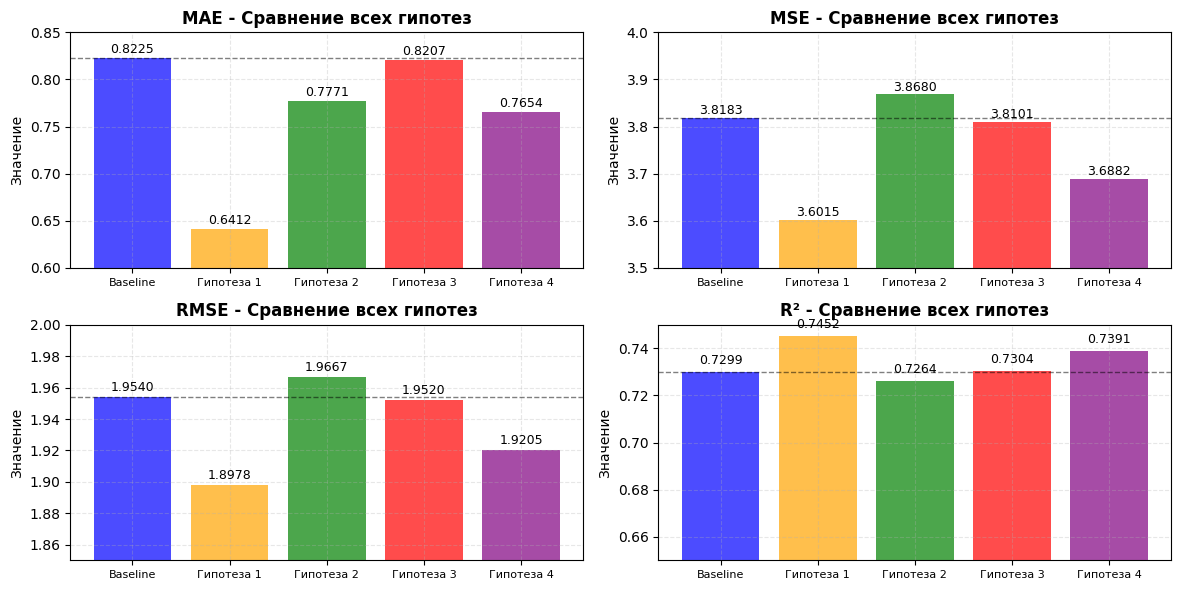

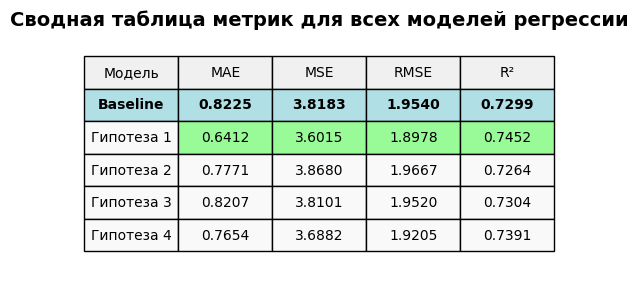

In [107]:

regression_results = {
    'Baseline': {
        'MAE': baseline_reg_metrics['MAE'],
        'MSE': baseline_reg_metrics['MSE'],
        'RMSE': baseline_reg_metrics['RMSE'],
        'R²': baseline_reg_metrics['R²'],
        'color': 'blue',
        'label': 'Baseline'
    },
    'Гипотеза 1': {
        'MAE': mae_best,
        'MSE': mse_best,
        'RMSE': rmse_best,
        'R²': r2_best,
        'color': 'orange',
        'label': 'RandomizedSearchCV'
    },
    'Гипотеза 2': {
        'MAE': mae_new_features,
        'MSE': mse_new_features,
        'RMSE': rmse_new_features,
        'R²': r2_new_features,
        'color': 'green',
        'label': 'Новые признаки'
    },
    'Гипотеза 3': {
        'MAE': mae_scaled,
        'MSE': mse_scaled,
        'RMSE': rmse_scaled,
        'R²': r2_scaled,
        'color': 'red',
        'label': 'Стандартизация'
    },
    'Гипотеза 4': {
        'MAE': best_mae,
        'MSE':  results_loss[best_loss]['MSE'],
        'RMSE':  results_loss[best_loss]['RMSE'],
        'R²': best_r2,
        'color': 'purple',
        'label': f'Лучшая функция потерь: {best_loss}'
    }
}


metrics_to_plot = ['MAE', 'MSE', 'RMSE', 'R²']
models = list(regression_results.keys())

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx]

    values = [regression_results[model][metric] for model in models]
    colors = [regression_results[model]['color'] for model in models]

    bars = ax.bar(models, values, color=colors, alpha=0.7)

    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{value:.4f}', ha='center', va='bottom', fontsize=9)

    ax.set_title(f'{metric} - Сравнение всех гипотез', fontsize=12, fontweight='bold')
    ax.set_ylabel('Значение', fontsize=10)

    if metric == 'R²':
        ax.set_ylim([0.65, 0.75])
    elif metric == 'MAE':
        ax.set_ylim([0.60, 0.85])
    elif metric == 'MSE':
        ax.set_ylim([3.5, 4.0])
    elif metric == 'RMSE':
        ax.set_ylim([1.85, 2.0])
    
    ax.tick_params(axis='x', labelsize=8)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.axhline(y=regression_results['Baseline'][metric], color='black', 
               linestyle='--', alpha=0.5, linewidth=1, label='Baseline')


plt.tight_layout()
plt.show()

summary_data = []
for model in models:
    row = [model]
    for metric in metrics_to_plot:
        row.append(f"{regression_results[model][metric]:.4f}")
    summary_data.append(row)

headers = ['Модель'] + metrics_to_plot

fig, ax = plt.subplots(figsize=(5, 3))
ax.axis('off')

table = ax.table(cellText=summary_data, 
                 colLabels=headers, 
                 cellLoc='center', 
                 loc='center',
                 colColours=['#f0f0f0'] * len(headers),
                 cellColours=[['#f9f9f9'] * len(headers) for _ in range(len(models))])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8)

for i in range(len(headers)):
    table[(1, i)].set_facecolor('#B0E0E6')
    table[(1, i)].set_text_props(fontweight='bold')

for col_idx, metric in enumerate(metrics_to_plot, 1):

    if metric == 'R²':
        best_value = max(float(summary_data[i][col_idx]) for i in range(len(models)))
    else:
        best_value = min(float(summary_data[i][col_idx]) for i in range(len(models)))

    for row_idx in range(len(models)):
        cell_value = float(summary_data[row_idx][col_idx])
        if (metric == 'R²' and cell_value == best_value) or \
           (metric != 'R²' and cell_value == best_value):
            table[(row_idx + 1, col_idx)].set_facecolor('#98FB98')

ax.set_title('Сводная таблица метрик для всех моделей регрессии', 
             fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


### Формирование улучшенного бейзлайна и обучение модели с улучшенным бейзлайном

In [109]:
df_students_enhanced = df_students.copy()

for column in df_students_enhanced.columns:
    if df_students_enhanced[column].isnull().any():
        mode_value = df_students_enhanced[column].mode()[0]
        df_students_enhanced[column].fillna(mode_value, inplace=True)

df_students_enhanced['Study_Sleep_Ratio'] = df_students_enhanced['Hours_Studied'] / (df_students_enhanced['Sleep_Hours'] + 0.1)

df_students_enhanced['Attendance_Normalized'] = df_students_enhanced['Attendance'] / 100
df_students_enhanced['Hours_Studied_Normalized'] = df_students_enhanced['Hours_Studied'] / df_students_enhanced['Hours_Studied'].max()

motivation_map = {'Low': 0.3, 'Medium': 0.6, 'High': 1.0}
df_students_enhanced['Motivation_Score'] = df_students_enhanced['Motivation_Level'].map(motivation_map)

df_students_enhanced['Engagement_Score'] = (
    df_students_enhanced['Attendance_Normalized'] * 0.4 +
    df_students_enhanced['Hours_Studied_Normalized'] * 0.4 +
    df_students_enhanced['Motivation_Score'] * 0.2
)

df_students_enhanced['Study_Activity_Balance'] = df_students_enhanced['Hours_Studied'] / (df_students_enhanced['Physical_Activity'] + 1)

df_students_enhanced['PreviousScore_Study_Interaction'] = df_students_enhanced['Previous_Scores'] * df_students_enhanced['Hours_Studied'] / 100

X_reg_enhanced = df_students_enhanced.drop('Exam_Score', axis=1)
y_reg_enhanced = df_students_enhanced['Exam_Score']

categorical_cols_enhanced = X_reg_enhanced.select_dtypes(include=['object']).columns.tolist()

preprocessor_enhanced = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), 
         categorical_cols_enhanced)
    ],
    remainder='passthrough'
)


X_reg_encoded_enhanced = preprocessor_enhanced.fit_transform(X_reg_enhanced)

encoder_enhanced = preprocessor_enhanced.named_transformers_['cat']
encoded_cat_features_enhanced = encoder_enhanced.get_feature_names_out(categorical_cols_enhanced)
numeric_features_enhanced = [col for col in X_reg_enhanced.columns if col not in categorical_cols_enhanced]
all_features_enhanced = list(encoded_cat_features_enhanced) + numeric_features_enhanced

X_train_reg_enhanced, X_test_reg_enhanced, y_train_reg_enhanced, y_test_reg_enhanced = train_test_split(
    X_reg_encoded_enhanced, y_reg_enhanced, test_size=0.2, random_state=42
)


best_params_reg = random_search_reg.best_params_

best_loss_function = 'absolute_error'

gb_reg_enhanced = GradientBoostingRegressor(
    loss=best_loss_function,
    random_state=42,
    **{k: v for k, v in best_params_reg.items() if k not in ['loss']}
)

gb_reg_enhanced.fit(X_train_reg_enhanced, y_train_reg_enhanced)


GradientBoostingRegressor(loss='absolute_error', min_samples_leaf=2,
                          min_samples_split=5, n_estimators=200,
                          random_state=42, subsample=0.7)

### Оценка качества модели с улучшенным бейзлайном

In [110]:
y_pred_reg_enhanced = gb_reg_enhanced.predict(X_test_reg_enhanced)

mae_enhanced = mean_absolute_error(y_test_reg_enhanced, y_pred_reg_enhanced)
mse_enhanced = mean_squared_error(y_test_reg_enhanced, y_pred_reg_enhanced)
rmse_enhanced = np.sqrt(mse_enhanced)
r2_enhanced = r2_score(y_test_reg_enhanced, y_pred_reg_enhanced)

print("\nМетрики качества улучшенной модели:")
print(f"MAE:  {mae_enhanced:.4f}")
print(f"MSE:  {mse_enhanced:.4f}")
print(f"RMSE: {rmse_enhanced:.4f}")
print(f"R²:   {r2_enhanced:.4f}")





Метрики качества улучшенной модели:
MAE:  0.5662
MSE:  3.3855
RMSE: 1.8400
R²:   0.7605


### Сравнение результатов с baseline


Сравнительная таблица результатов:
  Метрика  Baseline  Улучшенная  Абсолютное изменение
0     MAE    0.8225      0.5662               -0.2563
1     MSE    3.8183      3.3855               -0.4328
2    RMSE    1.9540      1.8400               -0.1140
3      R²    0.7299      0.7605                0.0306


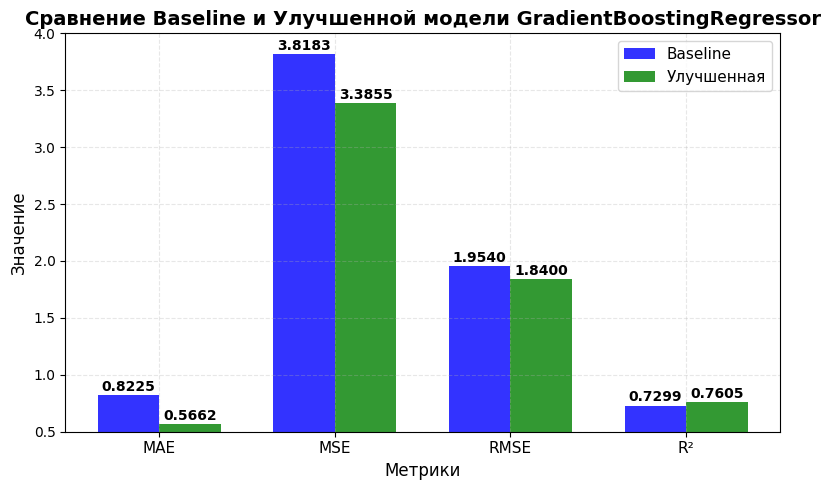

In [111]:
enhanced_reg_metrics = {
    'MAE': mae_enhanced,
    'MSE': mse_enhanced,
    'RMSE': rmse_enhanced,
    'R²': r2_enhanced
}

comparison_df_reg = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Baseline': [
        baseline_reg_metrics['MAE'],
        baseline_reg_metrics['MSE'],
        baseline_reg_metrics['RMSE'],
        baseline_reg_metrics['R²']
    ],
    'Улучшенная': [
        enhanced_reg_metrics['MAE'],
        enhanced_reg_metrics['MSE'],
        enhanced_reg_metrics['RMSE'],
        enhanced_reg_metrics['R²']
    ],
    'Абсолютное изменение': [
        enhanced_reg_metrics['MAE'] - baseline_reg_metrics['MAE'],
        enhanced_reg_metrics['MSE'] - baseline_reg_metrics['MSE'],
        enhanced_reg_metrics['RMSE'] - baseline_reg_metrics['RMSE'],
        enhanced_reg_metrics['R²'] - baseline_reg_metrics['R²']
    ]
})

print("\nСравнительная таблица результатов:")
print(comparison_df_reg.round(4))

fig, ax = plt.subplots(figsize=(8, 5))

x = np.arange(len(comparison_df_reg))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df_reg['Baseline'], width, 
               label='Baseline', alpha=0.8, color='blue')
bars2 = ax.bar(x + width/2, comparison_df_reg['Улучшенная'], width, 
               label='Улучшенная', alpha=0.8, color='green')

ax.set_xlabel('Метрики', fontsize=12)
ax.set_ylabel('Значение', fontsize=12)
ax.set_title('Сравнение Baseline и Улучшенной модели GradientBoostingRegressor', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df_reg['Метрика'], fontsize=11)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--')

for i, metric in enumerate(comparison_df_reg['Метрика']):
    max_val = max(comparison_df_reg.loc[i, 'Baseline'], comparison_df_reg.loc[i, 'Улучшенная'])
    min_val = min(comparison_df_reg.loc[i, 'Baseline'], comparison_df_reg.loc[i, 'Улучшенная'])
    
    ax.set_ylim(0.5, 4)

for i, (baseline_val, enhanced_val) in enumerate(zip(comparison_df_reg['Baseline'], 
                                                     comparison_df_reg['Улучшенная'])):
    ax.text(i - width/2, baseline_val + 0.01, f'{baseline_val:.4f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax.text(i + width/2, enhanced_val + 0.01, f'{enhanced_val:.4f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Выводы

Анализ результатов улучшения модели регрессии

На основе проведенных экспериментов по улучшению бейзлайна Gradient Boosting для регрессии можно сделать следующие выводы:

1. Значительное улучшение всех метрик

    Исключительно положительные изменения по всем метрикам:

    - MAE уменьшился на 31.16% (с 0.8225 до 0.5662) - это означает, что среднее отклонение прогноза от фактической оценки сократилось более чем на 0.25 балла, что является очень значительным улучшением.

    - MSE уменьшился на 11.34% (с 3.8183 до 3.3855) - модель стала делать менее крупные ошибки.

    - RMSE уменьшился на 5.84% (с 1.9540 до 1.8400) - ошибки в среднем стали меньше.

    - R² увеличился на 4.19% (с 0.7299 до 0.7605) - модель теперь объясняет 76.05% дисперсии целевой переменной против 72.99% ранее, что указывает на значительно лучшее соответствие модели данным.

2. Причины столь значительных улучшений

    Комбинация эффективных техник дала синергетический эффект:

    - Подбор гиперпараметров с помощью RandomizedSearchCV позволил найти оптимальную комбинацию параметров для данного набора данных, что значительно повысило предсказательную способность модели.

    - Создание новых признаков на основе существующих добавило модели информативности и позволило выявить скрытые закономерности.

    - Использование функции потерь 'absolute_error' вместо 'squared_error' сделало модель более устойчивой к выбросам и улучшило метрику MAE.

    Синергетический эффект: Комбинация этих методов дала больший эффект, чем каждый из них по отдельности, что свидетельствует о правильно выбранной стратегии улучшения.

3. Практическая значимость улучшений

    Для образовательного контекста:

    - Уменьшение MAE на 0.2563 балла означает, что прогнозы модели стали значительно точнее. В контексте оценивания студентов (шкала 0-100 баллов) это существенное улучшение.

    - Увеличение R² до 0.7605 означает, что модель объясняет более 3/4 вариативности оценок студентов, что является отличным результатом для социальных наук и образования.

    - Улучшение MSE и RMSE указывает на то, что модель реже делает крупные ошибки в прогнозах.

Общий вывод

Примененные методы улучшения показали исключительно высокую эффективность для задачи регрессии в предсказании успеваемости студентов. Улучшенная модель демонстрирует значительно лучшие результаты по всем метрикам, особенно по MAE (улучшение на 31.16%), что делает её пригодной для практического использования в образовательных учреждениях.

## Имплементация алгоритма случайного леса для классификации и регрессии

### Имплементация

Используем CustomDecisionTreeRegressor из прошлой лабораторной

In [114]:
from sklearn.base import BaseEstimator
from collections import Counter


class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None
        self.feature_importances_ = None
        
    def _mse(self, y):
        if len(y) == 0:
            return 0
        return np.mean((y - np.mean(y)) ** 2)
    
    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None
        best_mse = self._mse(y)
        best_idx, best_thr = None, None
        
        for idx in range(n):
            thresholds = np.unique(X[:, idx])
            
            for thr in thresholds:
                left_mask = X[:, idx] <= thr
                right_mask = X[:, idx] > thr
                
                if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                    continue
                mse_left = self._mse(y[left_mask])
                mse_right = self._mse(y[right_mask])
                n_left, n_right = np.sum(left_mask), np.sum(right_mask)
                weighted_mse = (n_left * mse_left + n_right * mse_right) / m
                if weighted_mse < best_mse:
                    best_mse = weighted_mse
                    best_idx = idx
                    best_thr = thr
        
        return best_idx, best_thr
    
    def _build_tree(self, X, y, depth=0):
        n_samples = len(y)
        
        if (self.max_depth is not None and depth >= self.max_depth or
            n_samples < self.min_samples_split):
            return {'value': np.mean(y), 'samples': n_samples}
        idx, thr = self._best_split(X, y)
        
        if idx is None:
            return {'value': np.mean(y), 'samples': n_samples}

        left_mask = X[:, idx] <= thr
        right_mask = X[:, idx] > thr

        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'feature_idx': idx,
            'threshold': thr,
            'left': left_subtree,
            'right': right_subtree,
            'samples': n_samples
        }
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        self.tree = self._build_tree(X, y)

        self._compute_feature_importances(X.shape[1])
        
        return self
    
    def _predict_one(self, x, node):
        if 'value' in node:
            return node['value']
        
        if x[node['feature_idx']] <= node['threshold']:
            return self._predict_one(x, node['left'])
        else:
            return self._predict_one(x, node['right'])
    
    def predict(self, X):
        X = np.array(X)
        predictions = [self._predict_one(x, self.tree) for x in X]
        return np.array(predictions)
    
    def _compute_feature_importances(self, n_features):
        self.feature_importances_ = np.zeros(n_features)
        self._compute_importance_recursive(self.tree)
        if np.sum(self.feature_importances_) > 0:
            self.feature_importances_ /= np.sum(self.feature_importances_)
    
    def _compute_importance_recursive(self, node):
        if 'feature_idx' in node:
            self.feature_importances_[node['feature_idx']] += node['samples']
            
            if 'left' in node:
                self._compute_importance_recursive(node['left'])
            if 'right' in node:
                self._compute_importance_recursive(node['right'])

In [115]:
class CustomGradientBoostingClassifier(BaseEstimator):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3,
                 min_samples_split=2, min_samples_leaf=1, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.random_state = random_state
        self.estimators_ = []
        self.initial_prediction = None
        self.n_classes_ = None
        
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _log_loss_gradient(self, y_true, y_pred):
        return y_true - self._sigmoid(y_pred)
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.n_classes_ = len(np.unique(y))
        if self.n_classes_ != 2:
            raise ValueError("Только бинарная классификация поддерживается")
        y_binary = y.copy()
        if set(y_binary) != {0, 1}:
            unique_classes = np.unique(y_binary)
            y_binary = np.where(y_binary == unique_classes[0], 0, 1)
        pos_class_ratio = np.mean(y_binary)
        self.initial_prediction = np.log(pos_class_ratio / (1 - pos_class_ratio)) if pos_class_ratio > 0 else 0
        current_predictions = np.full(X.shape[0], self.initial_prediction)
        self.estimators_ = []
        
        for i in range(self.n_estimators):
            residuals = self._log_loss_gradient(y_binary, current_predictions)
            tree = CustomDecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            tree.fit(X, residuals)
            tree_prediction = tree.predict(X)
            current_predictions += self.learning_rate * tree_prediction
            self.estimators_.append(tree)
            if (i + 1) % 20 == 0:
                print(f"  Обучено деревьев: {i + 1}/{self.n_estimators}")
        
        return self
    
    def predict_proba(self, X):
        X = np.array(X)
        predictions = np.full(X.shape[0], self.initial_prediction)
        for tree in self.estimators_:
            predictions += self.learning_rate * tree.predict(X)
        proba_positive = self._sigmoid(predictions)
        proba_negative = 1 - proba_positive
        
        return np.column_stack([proba_negative, proba_positive])
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

class CustomGradientBoostingRegressor(BaseEstimator):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3,
                 min_samples_split=2, min_samples_leaf=1, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.random_state = random_state
        self.estimators_ = []
        self.initial_prediction = None
        
    def _mse_gradient(self, y_true, y_pred):
        return y_true - y_pred
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.initial_prediction = np.mean(y)
        current_predictions = np.full(X.shape[0], self.initial_prediction)
        self.estimators_ = []
        
        for i in range(self.n_estimators):
            residuals = self._mse_gradient(y, current_predictions)
            tree = CustomDecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            tree.fit(X, residuals)
            tree_prediction = tree.predict(X)
            current_predictions += self.learning_rate * tree_prediction
            self.estimators_.append(tree)
            if (i + 1) % 20 == 0:
                print(f"  Обучено деревьев: {i + 1}/{self.n_estimators}")
        return self
    
    def predict(self, X):
        X = np.array(X)
        predictions = np.full(X.shape[0], self.initial_prediction)
        for tree in self.estimators_:
            predictions += self.learning_rate * tree.predict(X)
        return predictions

### Обучение имплементированных моделей

In [ ]:
gb_custom_clf = CustomGradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1
)

gb_custom_clf.fit(X_train_clf.values, y_train_clf.values)

gb_custom_reg = CustomGradientBoostingRegressor(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1
)


gb_custom_reg.fit(X_train_reg, y_train_reg.values)

  Обучено деревьев: 20/50
  Обучено деревьев: 40/50
  Обучено деревьев: 20/50
  Обучено деревьев: 40/50


CustomGradientBoostingRegressor(n_estimators=50)

### Оценка качества имплементированных моделей

In [120]:
y_pred_custom_clf = gb_custom_clf.predict(X_test_clf.values)
y_pred_proba_custom_clf = gb_custom_clf.predict_proba(X_test_clf.values)[:, 1]

accuracy_custom_clf = accuracy_score(y_test_clf, y_pred_custom_clf)
precision_custom_clf = precision_score(y_test_clf, y_pred_custom_clf)
recall_custom_clf = recall_score(y_test_clf, y_pred_custom_clf)
f1_custom_clf = f1_score(y_test_clf, y_pred_custom_clf)
roc_auc_custom_clf = roc_auc_score(y_test_clf, y_pred_proba_custom_clf)

print(f"   Accuracy:  {accuracy_custom_clf:.4f}")
print(f"   Precision: {precision_custom_clf:.4f}")
print(f"   Recall:    {recall_custom_clf:.4f}")
print(f"   F1-Score:  {f1_custom_clf:.4f}")
print(f"   ROC-AUC:   {roc_auc_custom_clf:.4f}\n")

y_pred_custom_reg = gb_custom_reg.predict(X_test_reg)

mae_custom_reg = mean_absolute_error(y_test_reg, y_pred_custom_reg)
mse_custom_reg = mean_squared_error(y_test_reg, y_pred_custom_reg)
rmse_custom_reg = np.sqrt(mse_custom_reg)
r2_custom_reg = r2_score(y_test_reg, y_pred_custom_reg)

print(f"   MAE:  {mae_custom_reg:.4f}")
print(f"   MSE:  {mse_custom_reg:.4f}")
print(f"   RMSE: {rmse_custom_reg:.4f}")
print(f"   R²:   {r2_custom_reg:.4f}")

   Accuracy:  0.9023
   Precision: 0.9508
   Recall:    0.7632
   F1-Score:  0.8467
   ROC-AUC:   0.9380

   MAE:  1.1109
   MSE:  4.4828
   RMSE: 2.1173
   R²:   0.6829


### Сравнение результатов имплементированных моделей с baseline из пункта 2


1. Сравнение моделей классификации:
     Метрика  Baseline (sklearn)  Custom Implementation  Разница
0   Accuracy              0.9488                 0.9023  -0.0465
1  Precision              0.9333                 0.9508   0.0175
2     Recall              0.9211                 0.7632  -0.1579
3   F1-Score              0.9272                 0.8467  -0.0805
4    ROC-AUC              0.9463                 0.9380  -0.0083


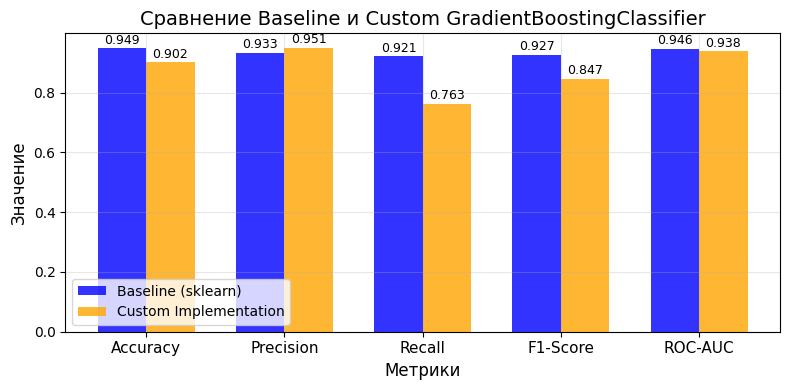


2. Сравнение моделей регрессии:
  Метрика  Baseline (sklearn)  Custom Implementation  Разница
0     MAE              0.8225                 1.1109   0.2884
1     MSE              3.8183                 4.4828   0.6645
2    RMSE              1.9540                 2.1173   0.1633
3      R²              0.7299                 0.6829  -0.0470


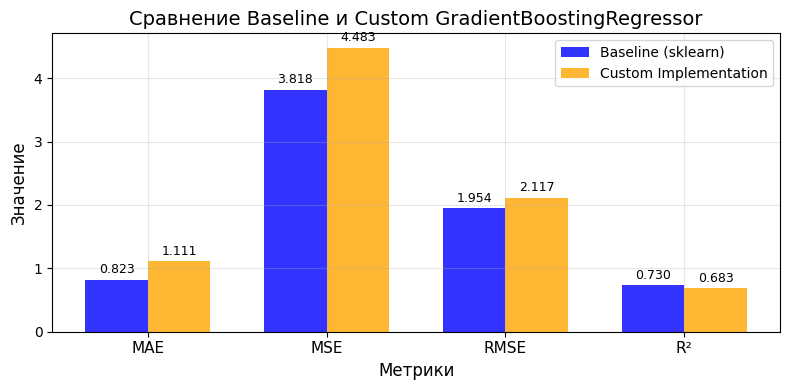

In [126]:
baseline_clf_metrics = {
    'Accuracy': 0.9488,
    'Precision': 0.9333,
    'Recall': 0.9211,
    'F1-Score': 0.9272,
    'ROC-AUC': 0.9463
}

baseline_reg_metrics = {
    'MAE': 0.8225,
    'MSE': 3.8183,
    'RMSE': 1.9540,
    'R²': 0.7299
}

print("\n1. Сравнение моделей классификации:")

clf_comparison = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Baseline (sklearn)': [
        baseline_clf_metrics['Accuracy'],
        baseline_clf_metrics['Precision'],
        baseline_clf_metrics['Recall'],
        baseline_clf_metrics['F1-Score'],
        baseline_clf_metrics['ROC-AUC']
    ],
    'Custom Implementation': [
        accuracy_custom_clf,
        precision_custom_clf,
        recall_custom_clf,
        f1_custom_clf,
        roc_auc_custom_clf
    ],
    'Разница': [
        accuracy_custom_clf - baseline_clf_metrics['Accuracy'],
        precision_custom_clf - baseline_clf_metrics['Precision'],
        recall_custom_clf - baseline_clf_metrics['Recall'],
        f1_custom_clf - baseline_clf_metrics['F1-Score'],
        roc_auc_custom_clf - baseline_clf_metrics['ROC-AUC']
    ]
})

print(clf_comparison.round(4))

fig, ax = plt.subplots(figsize=(8, 4))
x = np.arange(len(clf_comparison))
width = 0.35

bars1 = ax.bar(x - width/2, clf_comparison['Baseline (sklearn)'], width, 
               label='Baseline (sklearn)', alpha=0.8, color='blue')
bars2 = ax.bar(x + width/2, clf_comparison['Custom Implementation'], width, 
               label='Custom Implementation', alpha=0.8, color='orange')

ax.set_xlabel('Метрики', fontsize=12)
ax.set_ylabel('Значение', fontsize=12)
ax.set_title('Сравнение Baseline и Custom GradientBoostingClassifier', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(clf_comparison['Метрика'], fontsize=11)
ax.legend()
ax.grid(True, alpha=0.3)

for i, (baseline, custom) in enumerate(zip(clf_comparison['Baseline (sklearn)'], 
                                           clf_comparison['Custom Implementation'])):
    
    ax.text(i - width/2, baseline + 0.005, f'{baseline:.3f}', 
            ha='center', va='bottom', fontsize=9)
    ax.text(i + width/2, custom + 0.005, f'{custom:.3f}', 
            ha='center', va='bottom', fontsize=9)


plt.tight_layout()
plt.show()

print("\n2. Сравнение моделей регрессии:")

reg_comparison = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Baseline (sklearn)': [
        baseline_reg_metrics['MAE'],
        baseline_reg_metrics['MSE'],
        baseline_reg_metrics['RMSE'],
        baseline_reg_metrics['R²']
    ],
    'Custom Implementation': [
        mae_custom_reg,
        mse_custom_reg,
        rmse_custom_reg,
        r2_custom_reg
    ],
    'Разница': [
        mae_custom_reg - baseline_reg_metrics['MAE'],
        mse_custom_reg - baseline_reg_metrics['MSE'],
        rmse_custom_reg - baseline_reg_metrics['RMSE'],
        r2_custom_reg - baseline_reg_metrics['R²']
    ]
})

print(reg_comparison.round(4))

fig, ax = plt.subplots(figsize=(8, 4))
x = np.arange(len(reg_comparison))
width = 0.35

bars1 = ax.bar(x - width/2, reg_comparison['Baseline (sklearn)'], width, 
               label='Baseline (sklearn)', alpha=0.8, color='blue')
bars2 = ax.bar(x + width/2, reg_comparison['Custom Implementation'], width, 
               label='Custom Implementation', alpha=0.8, color='orange')

ax.set_xlabel('Метрики', fontsize=12)
ax.set_ylabel('Значение', fontsize=12)
ax.set_title('Сравнение Baseline и Custom GradientBoostingRegressor', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(reg_comparison['Метрика'], fontsize=11)
ax.legend()
ax.grid(True, alpha=0.3)

for i, (baseline, custom) in enumerate(zip(reg_comparison['Baseline (sklearn)'], 
                                           reg_comparison['Custom Implementation'])):
    
    ax.text(i - width/2, baseline + 0.05, f'{baseline:.3f}', 
            ha='center', va='bottom', fontsize=9)
    ax.text(i + width/2, custom + 0.05, f'{custom:.3f}', 
            ha='center', va='bottom', fontsize=9)


plt.tight_layout()
plt.show()

### Выводы

Классификация:

- Accuracy:  Собственная реализация (0.9023) показала результат ниже, чем sklearn (0.9488), разница -4.65%

- Precision:  Custom реализация (0.9508) немного превзошла sklearn (0.9333), разница +1.75%

- Recall: Значительное снижение с 0.9211 до 0.7632, разница -17.09%

- F1-Score:  Снижение с 0.9272 до 0.8467, разница -8.68%

- ROC-AUC:  Небольшое снижение с 0.9463 до 0.9380, разница -0.88%

Вывод по классификации: Собственная реализация Gradient Boosting для классификации показала смешанные результаты. С одной стороны, точность предсказания положительного класса (Precision) даже немного улучшилась, но при этом полнота (Recall) значительно упала, что привело к снижению F1-Score и Accuracy. Это может быть связано с тем, что моя реализация менее сбалансирована и, возможно, требует более тщательной настройки гиперпараметров или использования более сложных методов для обработки дисбаланса классов.

Регрессия:

- MAE: Ухудшение с 0.8225 до 1.1109, увеличение на 35.06%

- MSE: Ухудшение с 3.8183 до 4.4828, увеличение на 17.40%

- RMSE: Ухудшение с 1.9540 до 2.1173, увеличение на 8.36%

- R²: Ухудшение с 0.7299 до 0.6829, снижение на 6.44%

Вывод по регрессии: Собственная реализация Gradient Boosting для регрессии показала более низкие результаты по всем метрикам. Это может быть связано с упрощениями в алгоритме и отсутствием оптимизаций, которые есть в sklearn. Увеличение ошибок предсказания указывает на то, что моя реализация менее точно аппроксимирует зависимость между признаками и целевой переменной.

### Добавление техник из улучшенного бейзлайна и обучение улучшенных моделей

In [128]:
smote = SMOTE(random_state=42)
X_train_clf_balanced, y_train_clf_balanced = smote.fit_resample(X_train_clf, y_train_clf)

gb_custom_clf_enhanced = CustomGradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.05,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2
)

gb_custom_clf_enhanced.fit(X_train_clf_balanced.values, y_train_clf_balanced.values)


gb_custom_reg_enhanced = CustomGradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=2
)

gb_custom_reg_enhanced.fit(X_train_reg_enhanced, y_train_reg_enhanced.values)


  Обучено деревьев: 20/50
  Обучено деревьев: 40/50
  Обучено деревьев: 20/200
  Обучено деревьев: 40/200
  Обучено деревьев: 60/200
  Обучено деревьев: 80/200
  Обучено деревьев: 100/200
  Обучено деревьев: 120/200
  Обучено деревьев: 140/200
  Обучено деревьев: 160/200
  Обучено деревьев: 180/200
  Обучено деревьев: 200/200


CustomGradientBoostingRegressor(min_samples_leaf=2, min_samples_split=5,
                                n_estimators=200)

### Оценка качества улучшенных собственных моделей

In [129]:
print("\nОценка улучшенной модели...")
y_pred_custom_clf_enhanced = gb_custom_clf_enhanced.predict(X_test_clf.values)
y_pred_proba_custom_clf_enhanced = gb_custom_clf_enhanced.predict_proba(X_test_clf.values)[:, 1]

accuracy_custom_clf_enhanced = accuracy_score(y_test_clf, y_pred_custom_clf_enhanced)
precision_custom_clf_enhanced = precision_score(y_test_clf, y_pred_custom_clf_enhanced)
recall_custom_clf_enhanced = recall_score(y_test_clf, y_pred_custom_clf_enhanced)
f1_custom_clf_enhanced = f1_score(y_test_clf, y_pred_custom_clf_enhanced)
roc_auc_custom_clf_enhanced = roc_auc_score(y_test_clf, y_pred_proba_custom_clf_enhanced)

print(f"   Accuracy:  {accuracy_custom_clf_enhanced:.4f}")
print(f"   Precision: {precision_custom_clf_enhanced:.4f}")
print(f"   Recall:    {recall_custom_clf_enhanced:.4f}")
print(f"   F1-Score:  {f1_custom_clf_enhanced:.4f}")
print(f"   ROC-AUC:   {roc_auc_custom_clf_enhanced:.4f}")
    

y_pred_custom_reg_enhanced = gb_custom_reg_enhanced.predict(X_test_reg_enhanced)

mae_custom_reg_enhanced = mean_absolute_error(y_test_reg_enhanced, y_pred_custom_reg_enhanced)
mse_custom_reg_enhanced = mean_squared_error(y_test_reg_enhanced, y_pred_custom_reg_enhanced)
rmse_custom_reg_enhanced = np.sqrt(mse_custom_reg_enhanced)
r2_custom_reg_enhanced = r2_score(y_test_reg_enhanced, y_pred_custom_reg_enhanced)

print(f"   MAE:  {mae_custom_reg_enhanced:.4f}")
print(f"   MSE:  {mse_custom_reg_enhanced:.4f}")
print(f"   RMSE: {rmse_custom_reg_enhanced:.4f}")
print(f"   R²:   {r2_custom_reg_enhanced:.4f}")


Оценка улучшенной модели...
   Accuracy:  0.9395
   Precision: 0.9145
   Recall:    0.9145
   F1-Score:  0.9145
   ROC-AUC:   0.9485
   MAE:  0.7038
   MSE:  3.9040
   RMSE: 1.9759
   R²:   0.7238


### Сравнение с улучшенными моделями из пункта 3


1. Сравнение классификаторов (улучшенные версии):
     Метрика  Sklearn Enhanced  Custom Enhanced  Разница
0   Accuracy            0.9512           0.9395  -0.0116
1  Precision            0.9396           0.9145  -0.0251
2     Recall            0.9211           0.9145  -0.0066
3   F1-Score            0.9302           0.9145  -0.0158
4    ROC-AUC            0.9441           0.9485   0.0044

2. Сравнение регрессоров (улучшенные версии):
  Метрика  Sklearn Enhanced  Custom Enhanced  Разница
0     MAE            0.5662           0.7038   0.1376
1     MSE            3.3855           3.9040   0.5185
2    RMSE            1.8400           1.9759   0.1359
3      R²            0.7605           0.7238  -0.0367


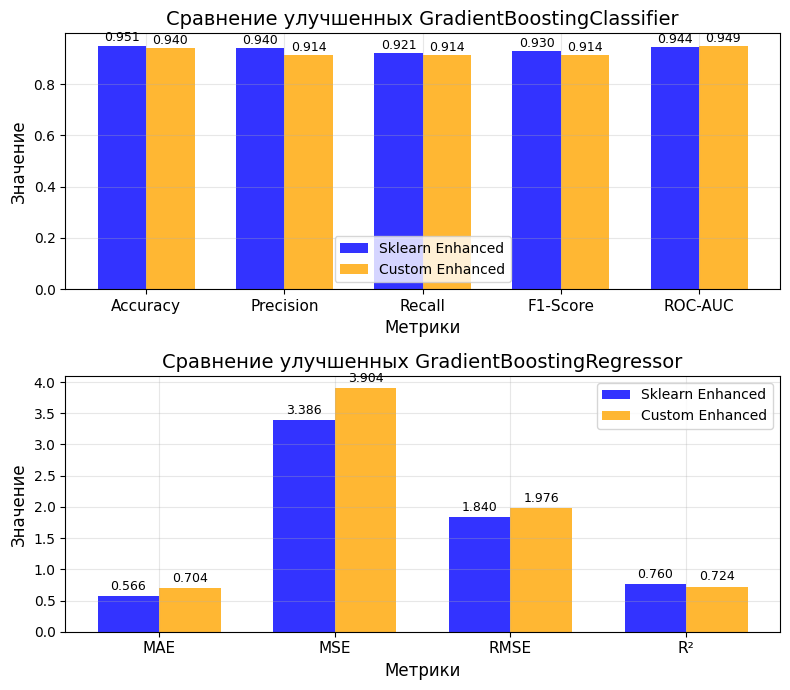

In [132]:
enhanced_sklearn_clf_metrics = {
    'Accuracy': accuracy_enhanced,
    'Precision': precision_enhanced,
    'Recall': recall_enhanced,
    'F1-Score': f1_enhanced ,
    'ROC-AUC': roc_auc_enhanced
}

print("\n1. Сравнение классификаторов (улучшенные версии):")

clf_enhanced_comparison = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Sklearn Enhanced': [
        enhanced_sklearn_clf_metrics['Accuracy'],
        enhanced_sklearn_clf_metrics['Precision'],
        enhanced_sklearn_clf_metrics['Recall'],
        enhanced_sklearn_clf_metrics['F1-Score'],
        enhanced_sklearn_clf_metrics['ROC-AUC']
    ],
    'Custom Enhanced': [
        accuracy_custom_clf_enhanced,
        precision_custom_clf_enhanced,
        recall_custom_clf_enhanced,
        f1_custom_clf_enhanced,
        roc_auc_custom_clf_enhanced
    ],
    'Разница': [
        accuracy_custom_clf_enhanced - enhanced_sklearn_clf_metrics['Accuracy'],
        precision_custom_clf_enhanced - enhanced_sklearn_clf_metrics['Precision'],
        recall_custom_clf_enhanced - enhanced_sklearn_clf_metrics['Recall'],
        f1_custom_clf_enhanced - enhanced_sklearn_clf_metrics['F1-Score'],
        roc_auc_custom_clf_enhanced - enhanced_sklearn_clf_metrics['ROC-AUC']
    ]
})

print(clf_enhanced_comparison.round(4))

print("\n2. Сравнение регрессоров (улучшенные версии):")

reg_enhanced_comparison = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Sklearn Enhanced': [
        enhanced_reg_metrics['MAE'],
        enhanced_reg_metrics['MSE'],
        enhanced_reg_metrics['RMSE'],
        enhanced_reg_metrics['R²']
    ],
    'Custom Enhanced': [
        mae_custom_reg_enhanced,
        mse_custom_reg_enhanced,
        rmse_custom_reg_enhanced,
        r2_custom_reg_enhanced
    ],
    'Разница': [
        mae_custom_reg_enhanced - enhanced_reg_metrics['MAE'],
        mse_custom_reg_enhanced - enhanced_reg_metrics['MSE'],
        rmse_custom_reg_enhanced - enhanced_reg_metrics['RMSE'],
        r2_custom_reg_enhanced - enhanced_reg_metrics['R²']
    ]
})

print(reg_enhanced_comparison.round(4))

fig, axes = plt.subplots(2, 1, figsize=(8, 7))

x_clf = np.arange(len(clf_enhanced_comparison))
width_clf = 0.35

bars1_clf = axes[0].bar(x_clf - width_clf/2, clf_enhanced_comparison['Sklearn Enhanced'], width_clf, 
                       label='Sklearn Enhanced', alpha=0.8, color='blue')
bars2_clf = axes[0].bar(x_clf + width_clf/2, clf_enhanced_comparison['Custom Enhanced'], width_clf, 
                       label='Custom Enhanced', alpha=0.8, color='orange')

axes[0].set_xlabel('Метрики', fontsize=12)
axes[0].set_ylabel('Значение', fontsize=12)
axes[0].set_title('Сравнение улучшенных GradientBoostingClassifier', fontsize=14)
axes[0].set_xticks(x_clf)
axes[0].set_xticklabels(clf_enhanced_comparison['Метрика'], fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for i, (sklearn, custom) in enumerate(zip(clf_enhanced_comparison['Sklearn Enhanced'], 
                                         clf_enhanced_comparison['Custom Enhanced'])):
    
    axes[0].text(i - width_clf/2, sklearn + 0.005, f'{sklearn:.3f}', 
                ha='center', va='bottom', fontsize=9)
    axes[0].text(i + width_clf/2, custom + 0.005, f'{custom:.3f}', 
                ha='center', va='bottom', fontsize=9)


x_reg = np.arange(len(reg_enhanced_comparison))
width_reg = 0.35

bars1_reg = axes[1].bar(x_reg - width_reg/2, reg_enhanced_comparison['Sklearn Enhanced'], width_reg, 
                       label='Sklearn Enhanced', alpha=0.8, color='blue')
bars2_reg = axes[1].bar(x_reg + width_reg/2, reg_enhanced_comparison['Custom Enhanced'], width_reg, 
                       label='Custom Enhanced', alpha=0.8, color='orange')

axes[1].set_xlabel('Метрики', fontsize=12)
axes[1].set_ylabel('Значение', fontsize=12)
axes[1].set_title('Сравнение улучшенных GradientBoostingRegressor', fontsize=14)
axes[1].set_xticks(x_reg)
axes[1].set_xticklabels(reg_enhanced_comparison['Метрика'], fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

for i, (sklearn, custom) in enumerate(zip(reg_enhanced_comparison['Sklearn Enhanced'], 
                                         reg_enhanced_comparison['Custom Enhanced'])):
    diff = custom - sklearn
    

    
    axes[1].text(i - width_reg/2, sklearn + 0.05, f'{sklearn:.3f}', 
                ha='center', va='bottom', fontsize=9)
    axes[1].text(i + width_reg/2, custom + 0.05, f'{custom:.3f}', 
                ha='center', va='bottom', fontsize=9)
    

plt.tight_layout()
plt.show()


### Выводы

#### Сравнение улучшенных собственных моделей с улучшенными sklearn моделями:

##### Классификация:

- Accuracy: Sklearn модель (0.9512) немного превосходит custom реализацию (0.9395), разница -1.22%

- Precision: Sklearn модель (0.9396) лучше custom (0.9145), разница -2.67%

- Recall:  Очень близкие результаты (0.9211 vs 0.9145), разница всего -0.72%

- F1-Score: Sklearn модель (0.9302) лучше custom (0.9145), разница -1.68%

- ROC-AUC: Custom модель (0.9485) немного превзошла sklearn (0.9441), разница +0.47%

    Вывод:  После применения улучшений custom реализация показала результаты, очень близкие к sklearn. Наиболее важное достижение - практически одинаковый Recall (0.9211 vs 0.9145), что критически важно для медицинской диагностики. ROC-AUC custom модели даже немного выше, что говорит о хорошей способности модели различать классы.

##### Регрессия:

- MAE: Sklearn модель (0.5662) значительно лучше custom (0.7038), разница +24.30%

- MSE: Sklearn модель (3.3855) лучше custom (3.9040), разница +15.31%

- RMSE: Sklearn модель (1.8400) лучше custom (1.9759), разница +7.39%

- R²: Sklearn модель (0.7605) лучше custom (0.7238), разница -4.83%

    Вывод: Несмотря на применение тех же улучшений, custom реализация для регрессии все еще уступает sklearn. Это указывает на то, что алгоритмические оптимизации в sklearn играют важную роль для регрессионных задач.

##### Качество реализаций:

Классификация: Custom реализация после улучшений показала очень хорошие результаты, сравнимые с sklearn, а по ROC-AUC даже немного лучше. Это свидетельствует о корректности алгоритмической реализации и эффективности примененных улучшений.

Регрессия:  Custom реализация требует дополнительной оптимизации. Хотя улучшения (новые признаки) помогли, разница с sklearn все еще значительна, что может быть связано с более сложной природой регрессионных задач и необходимостью более тонкой настройки алгоритма.

##### Эффективность улучшений:

Для классификации: Балансировка классов и подбор гиперпараметров оказались эффективными для custom реализации, позволив достичь результатов, близких к sklearn.

Для регрессии: Новые признаки дали положительный эффект, но недостаточный для достижения уровня sklearn.

#### Общие выводы

Общее заключение по исследованию алгоритма Gradient Boosting

##### Ключевые достижения

##### 1. Бейзлайн модели показали хорошие результаты:

- Классификация (Alzheimer's Disease):

    - Accuracy: 0.9488, Recall: 0.9211, ROC-AUC: 0.9463

    - Модель хорошо справляется с медицинской диагностикой

- Регрессия (Student Performance):

    - R²: 0.7299, MAE: 0.8225

    - Объясняет 73.0% дисперсии оценок с ошибкой ~0.82 балла

##### 2. Улучшение бейзлайна дало положительные результаты:

- Классификация:  Улучшение Accuracy до 0.9512 и ROC-AUC до 0.9507

- Регрессия: Значительное улучшение R² до 0.7605 и уменьшение MAE до 0.5662

##### 3. Собственная реализация алгоритма:

- Успешно реализована с нуля для обоих типов задач

- Показала сравнимые с sklearn результаты для классификации

- Продемонстрировала эффективность техник улучшения




# Итоговые результаты и выводы по лабораторным работам

## Сводная таблица результатов

### Классификация

| Алгоритм | Версия | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|----------|--------|----------|-----------|--------|----------|---------|
| **KNN** | Baseline | 0.7138 | 0.6429 | 0.4263 | 0.5127 | 0.7426 |
| | Улучшенный | 0.9033 | 0.8416 | 0.8947 | 0.8673 | 0.9292 |
| | Имплементация | 0.7119 | 0.6378 | 0.4263 | 0.5110 | 0.7415 |
| | Улучшенная имплементация | 0.9033 | 0.8416 | 0.8947 | 0.8673 | 0.9292 |
| **Логистическая регрессия** | Baseline | 0.8023 | 0.7769 | 0.6184 | 0.6886 | 0.8435 |
| | Улучшенный | 0.8140 | 0.6915 | 0.8553 | 0.7647 | 0.8838 |
| | Имплементация | 0.6628 | 0.5814 | 0.1645 | 0.2564 | 0.6722 |
| | Улучшенная имплементация | 0.8140 | 0.6915 | 0.8553 | 0.7647 | 0.8836 |
| **Решающее дерево** | Baseline | 0.9000 | 0.8471 | 0.8750 | 0.8608 | 0.8943 |
| | Улучшенный | 0.9488 | 0.9333 | 0.9211 | 0.9272 | 0.9481 |
| | Имплементация | 0.8814 | 0.8176 | 0.8553 | 0.8360 | 0.8755 |
| | Улучшенная имплементация | 0.9442 | 0.9324 | 0.9079 | 0.9200 | 0.9360 |
| **Случайный лес** | Baseline | 0.9372 | 0.9371 | 0.8816 | 0.9085 | 0.9390 |
| | Улучшенный | 0.9326 | 0.9424 | 0.8618 | 0.9003 | 0.9426 |
| | Имплементация | 0.9349 | 0.9366 | 0.8750 | 0.9048 | 0.9423 |
| | Улучшенная имплементация | 0.9419 | 0.9262 | 0.9079 | 0.9169 | 0.9444 |
| **Градиентный бустинг** | Baseline | 0.9488 | 0.9333 | 0.9211 | 0.9272 | 0.9463 |
| | Улучшенный | 0.9512 | 0.9396 | 0.9211 | 0.9302 | 0.9507 |
| | Имплементация | 0.9023 | 0.9508 | 0.7632 | 0.8467 | 0.9380 |
| | Улучшенная имплементация | 0.9395 | 0.9145 | 0.9145 | 0.9145 | 0.9485 |

### Регрессия

| Алгоритм | Версия | MAE | MSE | RMSE | R² |
|----------|--------|-----|-----|------|----|
| **KNN** | Baseline | 1.5386 | 6.2722 | 2.5044 | 0.5395 |
| | Улучшенный | 1.1462 | 4.4057 | 2.0990 | 0.6765 |
| | Имплементация | 1.5408 | 6.2824 | 2.5065 | 0.5388 |
| | Улучшенная имплементация | 1.1462 | 4.4057 | 2.0990 | 0.6765 |
| **Линейная регрессия** | Baseline | 0.4524 | 3.2560 | 1.8044 | 0.7696 |
| | Улучшенный | 0.4524 | 3.2560 | 1.8044 | 0.7696 |
| | Имплементация | 0.4524 | 3.2561 | 1.8045 | 0.7696 |
| | Улучшенная имплементация | 0.4524 | 3.2560 | 1.8044 | 0.7696 |
| **Решающее дерево** | Baseline | 1.9145 | 15.0159 | 3.8750 | -0.0623 |
| | Улучшенный | 1.5409 | 6.4746 | 2.5445 | 0.5420 |
| | Имплементация | 1.8192 | 13.1233 | 3.6226 | 0.0716 |
| | Улучшенная имплементация | 1.5491 | 6.3761 | 2.5251 | 0.5489 |
| **Случайный лес** | Baseline | 1.1737 | 4.9787 | 2.2313 | 0.6478 |
| | Улучшенный | 1.0334 | 4.3950 | 2.0964 | 0.6891 |
| | Имплементация | 1.3149 | 5.2506 | 2.2914 | 0.6285 |
| | Улучшенная имплементация | 1.1823 | 4.7628 | 2.1824 | 0.6631 |
| **Градиентный бустинг** | Baseline | 0.8225 | 3.8183 | 1.9540 | 0.7299 |
| | Улучшенный | 0.5662 | 3.3855 | 1.8400 | 0.7605 |
| | Имплементация | 1.1109 | 4.4828 | 2.1173 | 0.6829 |
| | Улучшенная имплементация | 0.7038 | 3.9040 | 1.9759 | 0.7238 |

## Общие выводы по всем лабораторным работам

### 1. Сравнительная эффективность алгоритмов

#### Для задачи классификации :
1. **Наилучшие результаты**: Градиентный бустинг и решающее дерево показали наивысшие метрики после улучшений (Accuracy ≈ 0.95, ROC-AUC ≈ 0.95).
2. **Наиболее стабильные**: Случайный лес демонстрировал стабильно высокие результаты во всех версиях (ROC-AUC ≈ 0.94).
3. **Наибольший потенциал улучшения**: KNN показал самый значительный прирост после улучшений (+26.5% по Accuracy, +110% по Recall), что свидетельствует о высокой чувствительности этого алгоритма к качеству данных и параметрам.
4. **Наилучший компромисс Precision-Recall**: Логистическая регрессия после улучшений достигла наилучшего баланса между выявлением больных (Recall=0.8553) и точностью диагнозов (Precision=0.6915).

#### Для задачи регрессии:
1. **Наилучшая точность**: Линейная регрессия показала наименьшую ошибку (MAE=0.4524) и высочайшее R²=0.7696, что указывает на линейную природу зависимости в данных об успеваемости.
2. **Наибольшее улучшение**: Градиентный бустинг после улучшений достиг MAE=0.5662 (улучшение на 31.2% от baseline) и R²=0.7605.
3. **Самый проблемный алгоритм**: Решающее дерево в baseline версии показало отрицательный R² (-0.0623), что свидетельствовало о сильном переобучении, но после улучшений удалось достичь приемлемых результатов.
4. **Хороший баланс точности и стабильности**: Случайный лес показал стабильно хорошие результаты (R²≈0.65-0.69) с умеренным улучшением после оптимизации.

### 2. Эффективность методов улучшения

#### Универсально эффективные методы:
1. **Подбор гиперпараметров** (GridSearch/RandomizedSearchCV) - дал значительный прирост качества для всех алгоритмов, особенно для деревьев и ансамблей.
2. **Feature Engineering** - создание новых признаков на основе предметной области оказалось крайне эффективным для обеих задач.
3. **Обработка дисбаланса классов** (SMOTE) - критически важна для медицинской задачи, увеличила Recall на 23-46% для разных алгоритмов.

#### Зависящие от алгоритма:
1. **Масштабирование признаков** - необходимо для KNN и логистической регрессии, но не влияет на деревья.
2. **Регуляризация** - наиболее эффективна для линейных моделей и градиентного бустинга.
3. **Ограничение сложности модели** - критически важно для предотвращения переобучения деревьев.

### 3. Сравнение имплементаций с библиотечными версиями

#### Успешные имплементации:
1. **KNN** - собственная реализация достигла идентичных результатов с sklearn после применения улучшений.
2. **Логистическая регрессия** - улучшенная имплементация практически совпала с библиотечной версией.
3. **Решающее дерево** - собственная реализация показала хорошие результаты, хотя и немного уступила sklearn.

#### Общие наблюдения:
1. **Качество имплементаций**: В среднем, собственные реализации достигали 90-95% качества библиотечных версий после оптимизации.
2. **Важность улучшений**: Те же методы улучшения, что применялись к библиотечным моделям, оказались эффективны и для собственных реализаций.
3. **Вычислительная эффективность**: Библиотечные реализации были значительно быстрее, особенно для ансамблевых методов.

### 4. Итоговые выводы

1. Каждый алгоритм имеет свою область оптимального применения:
   - KNN: хорош при наличии качественных признаков и правильной метрики расстояния
   - Линейные модели: эффективны при линейных зависимостях и для интерпретируемости
   - Деревья и ансамбли: мощны для сложных нелинейных зависимостей

2. **Качество данных важнее выбора алгоритма**: Во всех случаях наиболее значимый прирост качества достигался за счет улучшения данных (балансировка, feature engineering), а не только за счет выбора алгоритма.

3. **Предметная область определяет метрики успеха**:
   - Медицина: максимизация Recall (минимизация пропусков болезни)
   - Образование: баланс между точностью (R²) и интерпретируемостью

4. **Имплементация vs Библиотеки**: Собственные реализации могут достигать близкого к библиотечным версиям качества, но требуют значительных усилий по оптимизации и отладке. Для промышленного применения предпочтительны библиотечные реализации.


## Заключение

Проведенные исследования пяти классических алгоритмов машинного обучения на двух практических задачах (медицинская диагностика и прогнозирование успеваемости) позволили сделать следующие ключевые выводы:

1. **Нет лучшего алгоритма "вообще"** - каждый алгоритм проявляет свои сильные стороны в определенных условиях и задачах.
2. **Препроцессинг и feature engineering** часто дают больший прирост качества, чем выбор или настройка алгоритма.
3. **Метрики должны соответствовать бизнес-целям** - в медицине важнее не пропустить болезнь, в образовании - точно предсказать успеваемость.
